In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Train/validation split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define YOLO-like model (Simplified CNN with Dense layers)
def yolo_like_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Define CNN model
def cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Define RNN model using LSTM (Reshape input for LSTM)
def rnn_model():
    model = models.Sequential()
    model.add(layers.LSTM(128, input_shape=(32, 96))) # Reshaped to 32x96
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Compile and train the model
def compile_and_train(model, model_name):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f"{model_name} Test accuracy: {test_acc:.4f}")
    return history

# Main code to run YOLO-like, CNN, and RNN models
if __name__ == '__main__':
    # YOLO-like model
    print("Training YOLO-like model:")
    yolo_model = yolo_like_model()
    compile_and_train(yolo_model, "YOLO-like")
    
    # CNN model
    print("\nTraining CNN model:")
    cnn = cnn_model()
    compile_and_train(cnn, "CNN")
    
    # RNN model
    print("\nTraining RNN model:")
    # Reshape for RNN
    x_train_rnn = x_train.reshape((x_train.shape[0], 32, 32*3))  # 32x96 sequences
    x_val_rnn = x_val.reshape((x_val.shape[0], 32, 32*3))
    x_test_rnn = x_test.reshape((x_test.shape[0], 32, 32*3))
    
    rnn = rnn_model()
    rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    rnn.fit(x_train_rnn, y_train, epochs=10, batch_size=64, validation_data=(x_val_rnn, y_val))
    test_loss, test_acc = rnn.evaluate(x_test_rnn, y_test, verbose=2)
    print(f"RNN Test accuracy: {test_acc:.4f}")


Training YOLO-like model:


c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.3055 - loss: 1.8662 - val_accuracy: 0.5018 - val_loss: 1.3864
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5214 - loss: 1.3253 - val_accuracy: 0.5821 - val_loss: 1.1845
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5883 - loss: 1.1662 - val_accuracy: 0.5959 - val_loss: 1.1420
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.6232 - loss: 1.0679 - val_accuracy: 0.6129 - val_loss: 1.0922
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6462 - loss: 1.0030 - val_accuracy: 0.6490 - val_loss: 0.9899
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.6770 - loss: 0.9179 - val_accuracy: 0.6659 - val_loss: 0.9621
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.6932 - loss: 0.8728 - val_accuracy: 0.6689 - val_loss: 0.9455
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7068 - loss: 0.8295 - 

c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.2643 - loss: 1.9984 - val_accuracy: 0.3688 - val_loss: 1.7268
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.4081 - loss: 1.6385 - val_accuracy: 0.4311 - val_loss: 1.5645
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.4572 - loss: 1.5068 - val_accuracy: 0.4581 - val_loss: 1.4886
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4873 - loss: 1.4276 - val_accuracy: 0.4790 - val_loss: 1.4405
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.5089 - loss: 1.3569 - val_accuracy: 0.5079 - val_loss: 1.3644
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.5289 - loss: 1.3044 - val_accuracy: 0.5261 - val_loss: 1.3238
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.5501 - loss: 1.2538 - val_accuracy: 0.5139 - val_loss: 1.3413
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.5615 - loss: 1.2075 - 


Displaying YOLO-like model predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


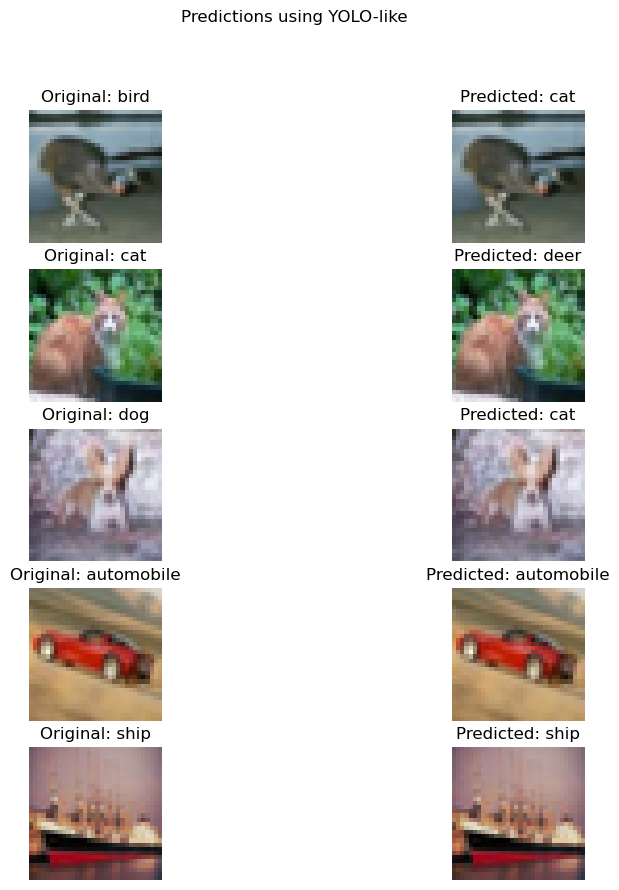


Displaying CNN model predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


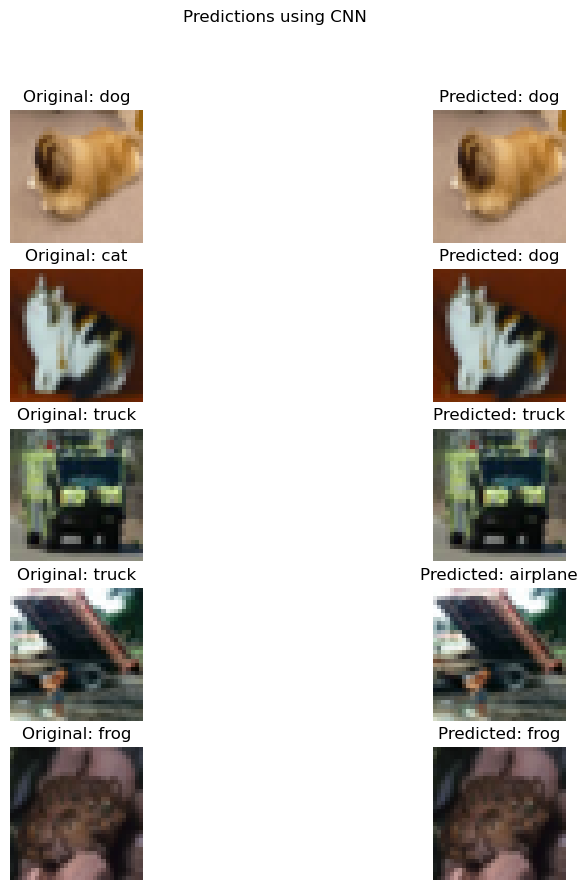


Displaying RNN model predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


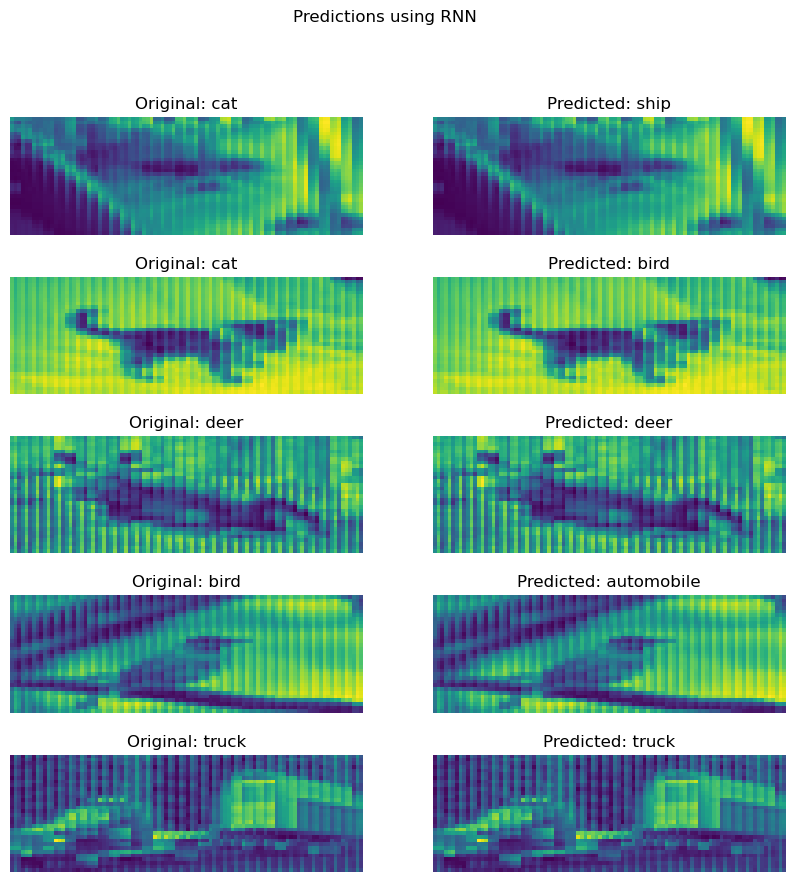

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Define function to plot original and predicted images
def plot_predictions(model, x_test, y_test, model_name, reshaped=False):
    plt.figure(figsize=(10, 10))
    num_images = 5  # Display 5 images for demonstration
    indices = np.random.choice(np.arange(x_test.shape[0]), num_images, replace=False)
    
    for i, idx in enumerate(indices):
        # Reshape if necessary for RNN
        if reshaped:
            input_data = x_test[idx].reshape(1, 32, 96)
        else:
            input_data = x_test[idx].reshape(1, 32, 32, 3)
        
        # Get prediction
        predictions = model.predict(input_data)
        predicted_label = np.argmax(predictions)
        true_label = y_test[idx][0]

        # Plot original image
        plt.subplot(5, 2, 2*i+1)
        plt.imshow(x_test[idx])
        plt.title(f"Original: {class_names[true_label]}")
        plt.axis('off')

        # Plot prediction result
        plt.subplot(5, 2, 2*i+2)
        plt.imshow(x_test[idx])  # Displaying the original, but here we can apply transformations if needed
        plt.title(f"Predicted: {class_names[predicted_label]}")
        plt.axis('off')

    plt.suptitle(f"Predictions using {model_name}")
    plt.show()

# Display results for YOLO-like, CNN, and RNN models
if __name__ == '__main__':
    # Load CIFAR-10 labels and display predictions for YOLO-like, CNN, and RNN models
    print("\nDisplaying YOLO-like model predictions:")
    plot_predictions(yolo_model, x_test, y_test, model_name="YOLO-like")

    print("\nDisplaying CNN model predictions:")
    plot_predictions(cnn, x_test, y_test, model_name="CNN")

    print("\nDisplaying RNN model predictions:")
    # Reshape for RNN before plotting
    x_test_rnn = x_test.reshape((x_test.shape[0], 32, 32*3))
    plot_predictions(rnn, x_test_rnn, y_test, model_name="RNN", reshaped=True)


c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 27ms/step - accuracy: 0.2777 - loss: 1.9692 - val_accuracy: 0.3886 - val_loss: 1.6760
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4035 - loss: 1.6402 - val_accuracy: 0.4426 - val_loss: 1.5417
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.4513 - loss: 1.5190 - val_accuracy: 0.4691 - val_loss: 1.4603
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4815 - loss: 1.4304 - val_accuracy: 0.4963 - val_loss: 1.3984
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.5066 - loss: 1.3724 - val_accuracy: 0.5050 - val_loss: 1.3771

Displaying LSTM model predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


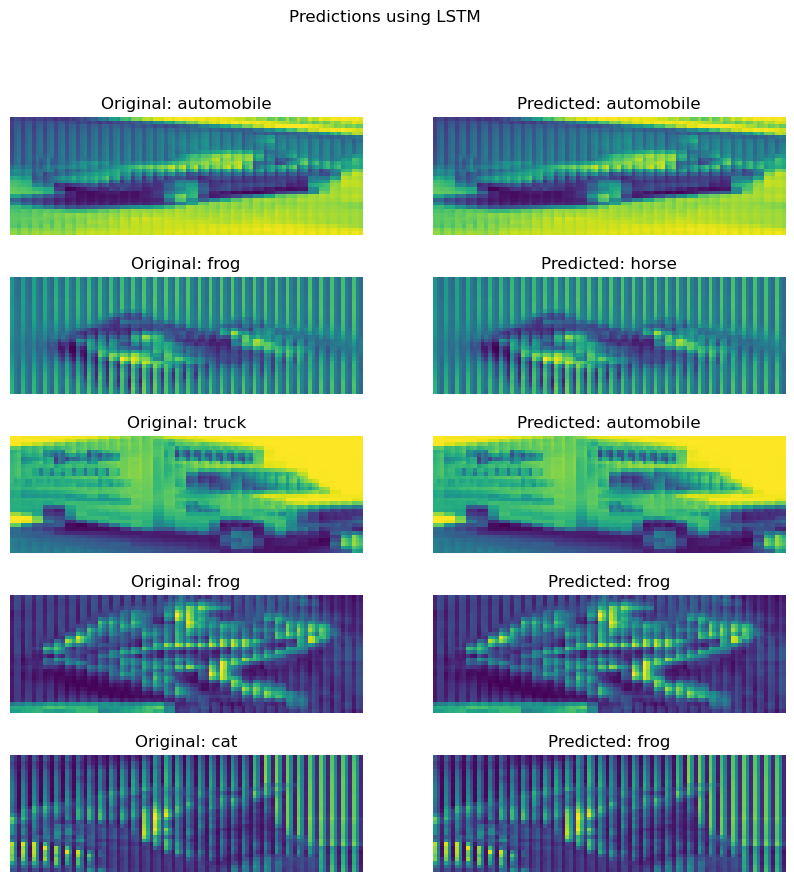

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, TimeDistributed

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Define LSTM model for CIFAR-10
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(32, 96), return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()

# Define function to plot original and predicted images
def plot_predictions(model, x_test, y_test, model_name, reshaped=False):
    plt.figure(figsize=(10, 10))
    num_images = 5  # Display 5 images for demonstration
    indices = np.random.choice(np.arange(x_test.shape[0]), num_images, replace=False)
    
    for i, idx in enumerate(indices):
        # Reshape if necessary for RNN
        if reshaped:
            input_data = x_test[idx].reshape(1, 32, 96)
        else:
            input_data = x_test[idx].reshape(1, 32, 32, 3)
        
        # Get prediction
        predictions = model.predict(input_data)
        predicted_label = np.argmax(predictions)
        true_label = y_test[idx][0]

        # Plot original image
        plt.subplot(5, 2, 2*i+1)
        plt.imshow(x_test[idx])
        plt.title(f"Original: {class_names[true_label]}")
        plt.axis('off')

        # Plot prediction result
        plt.subplot(5, 2, 2*i+2)
        plt.imshow(x_test[idx])  # Displaying the original, but here we can apply transformations if needed
        plt.title(f"Predicted: {class_names[predicted_label]}")
        plt.axis('off')

    plt.suptitle(f"Predictions using {model_name}")
    plt.show()

# Train LSTM model
x_train_rnn = x_train.reshape((x_train.shape[0], 32, 32 * 3))
x_test_rnn = x_test.reshape((x_test.shape[0], 32, 32 * 3))

lstm_model.fit(x_train_rnn, y_train, epochs=5, batch_size=64, validation_data=(x_test_rnn, y_test))

# Display results for LSTM model
if __name__ == '__main__':
    print("\nDisplaying LSTM model predictions:")
    plot_predictions(lstm_model, x_test_rnn, y_test, model_name="LSTM", reshaped=True)

c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Displaying YOLO-like model predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


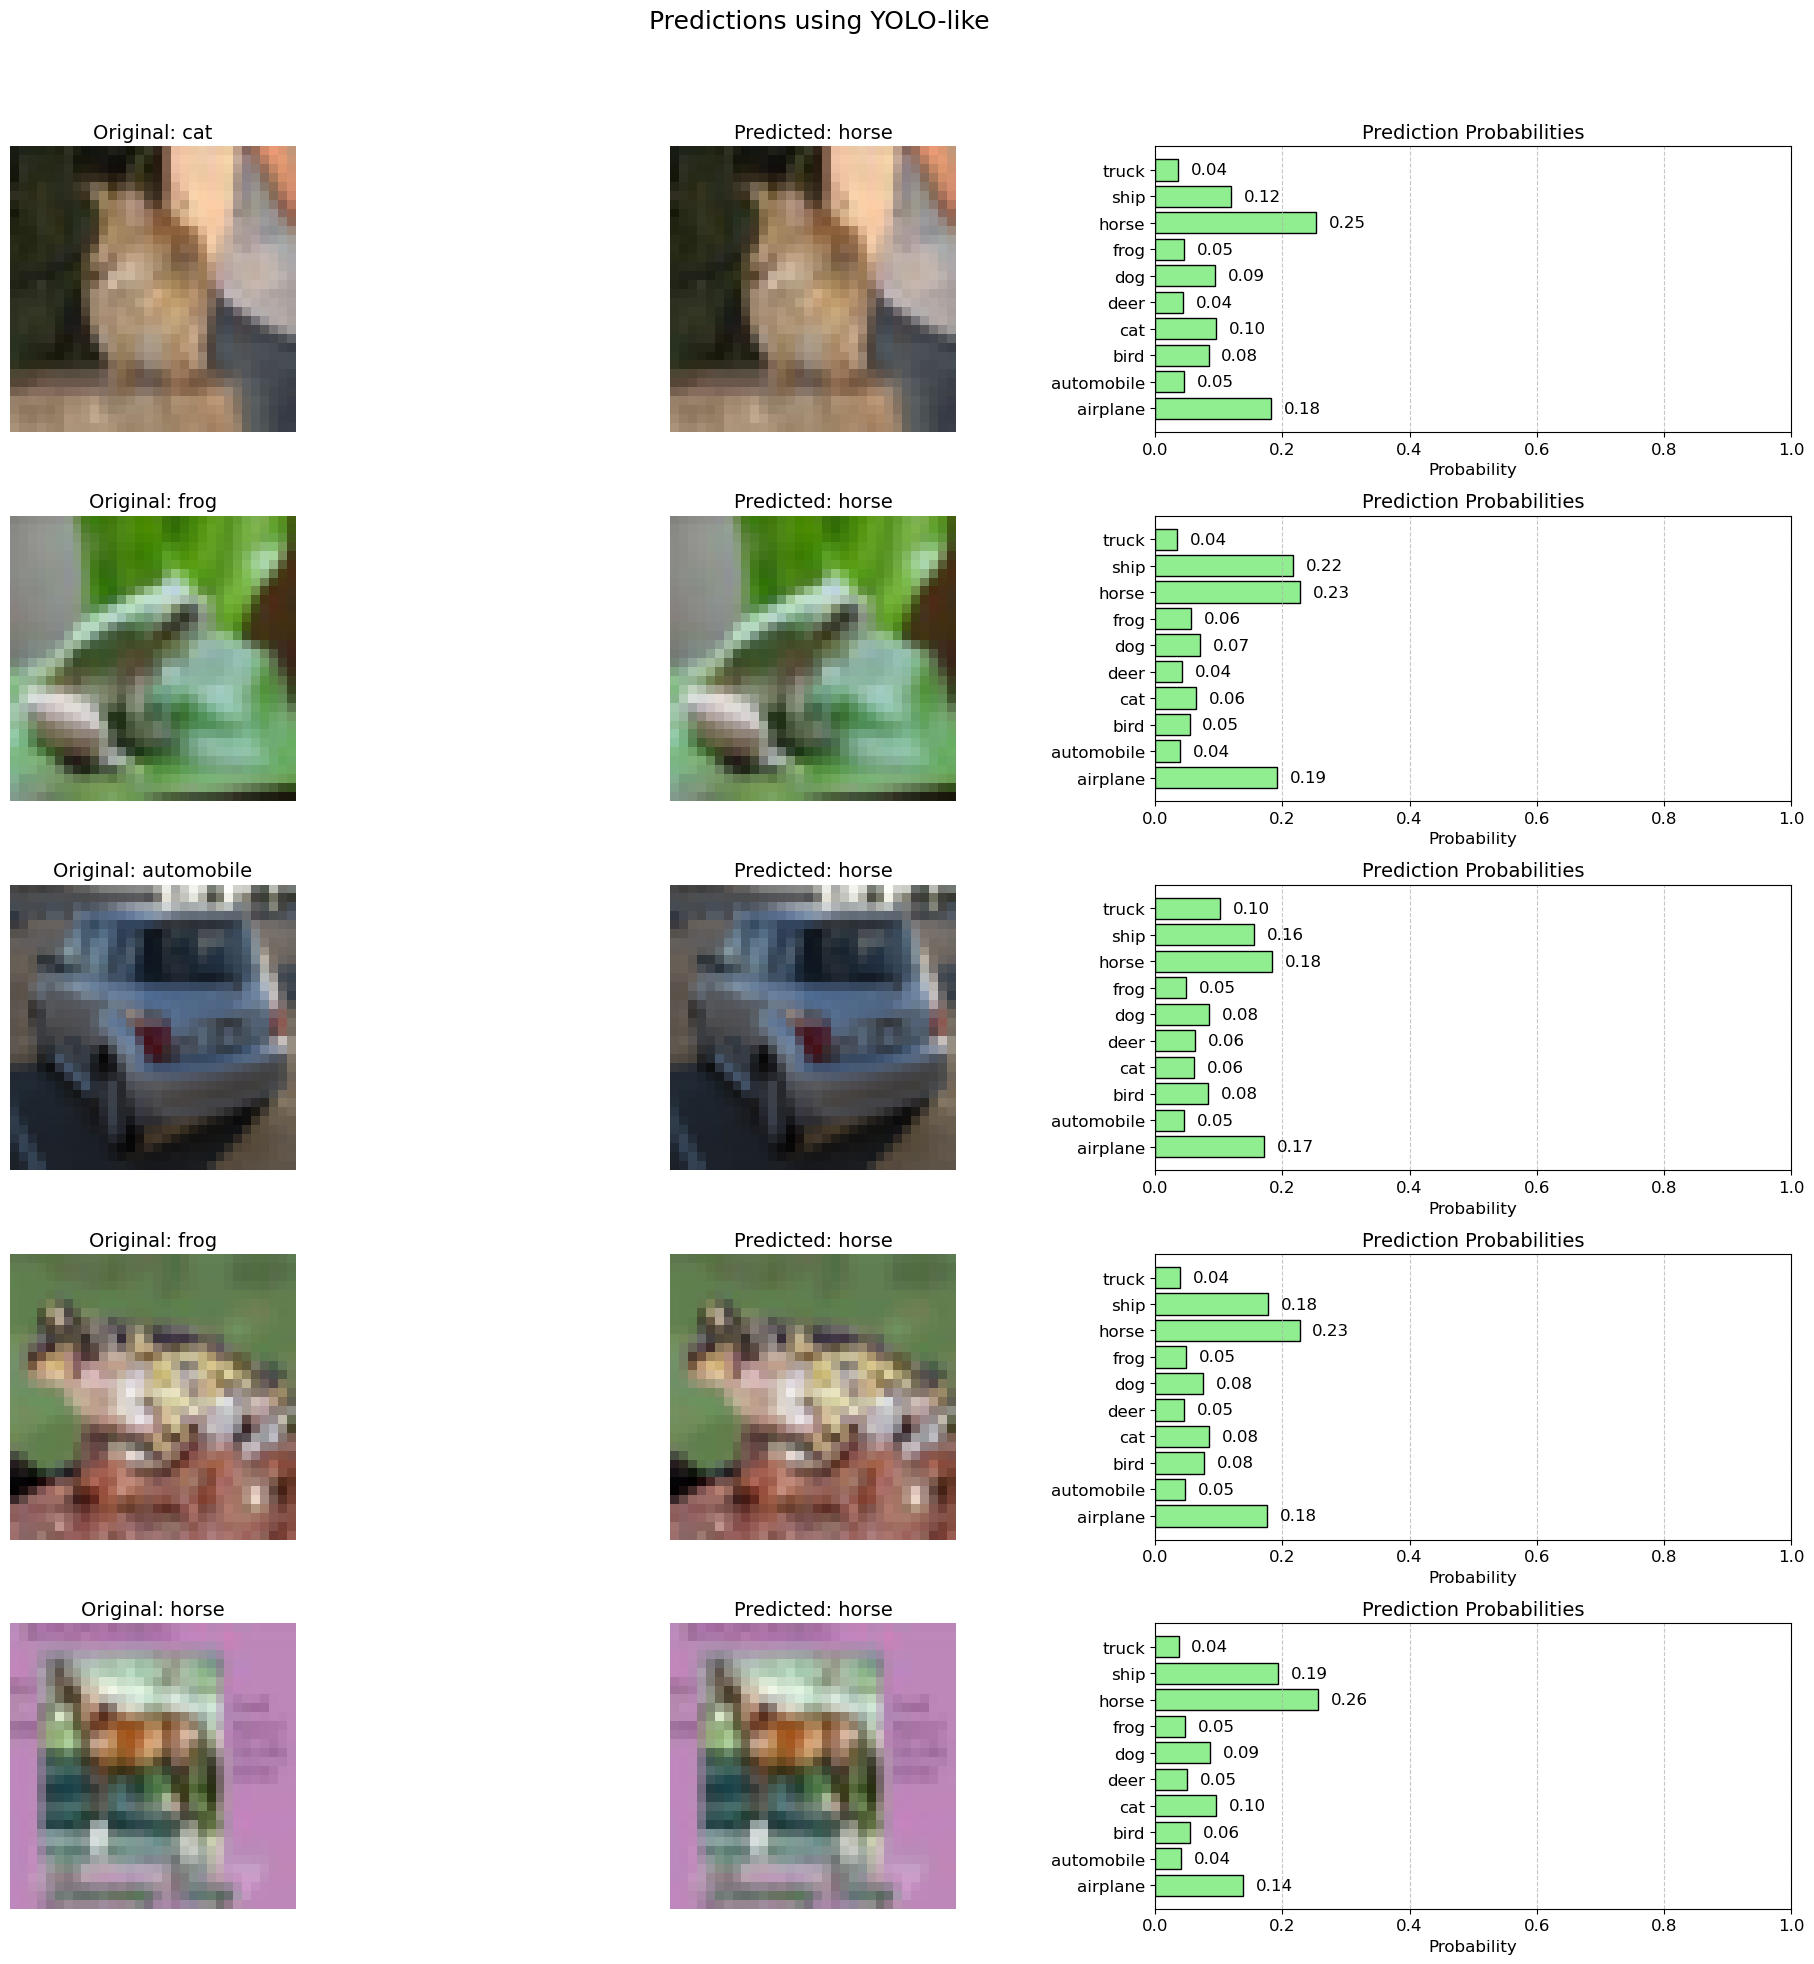

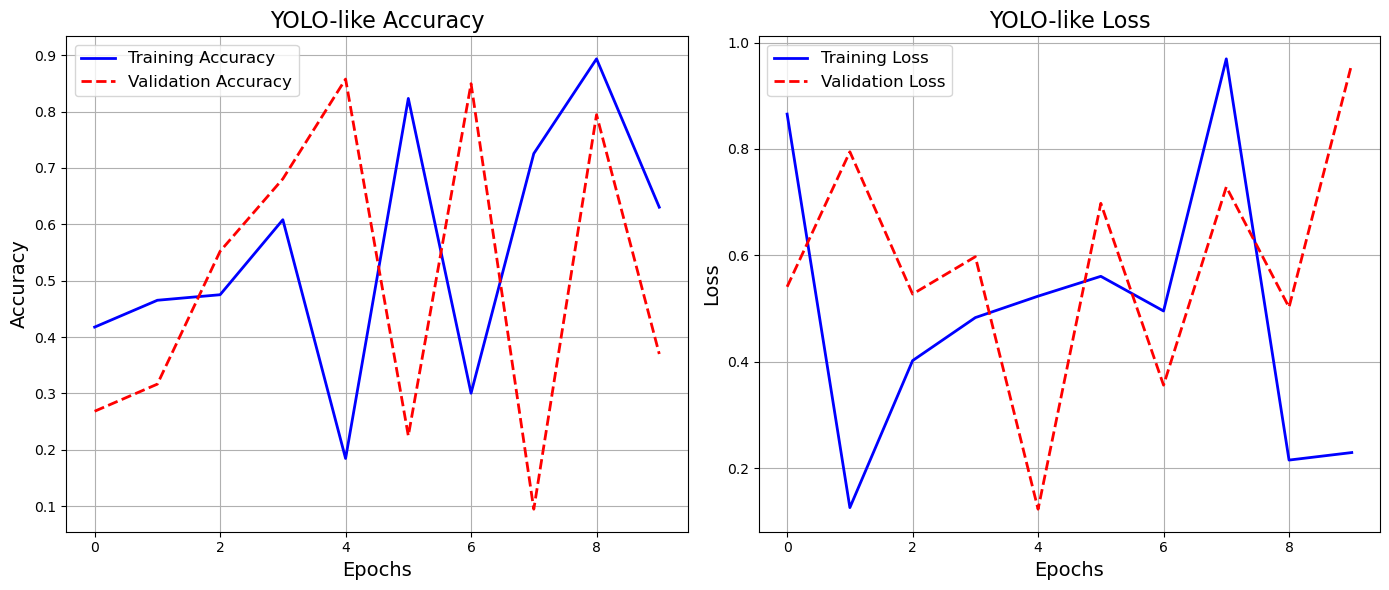


Displaying CNN model predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


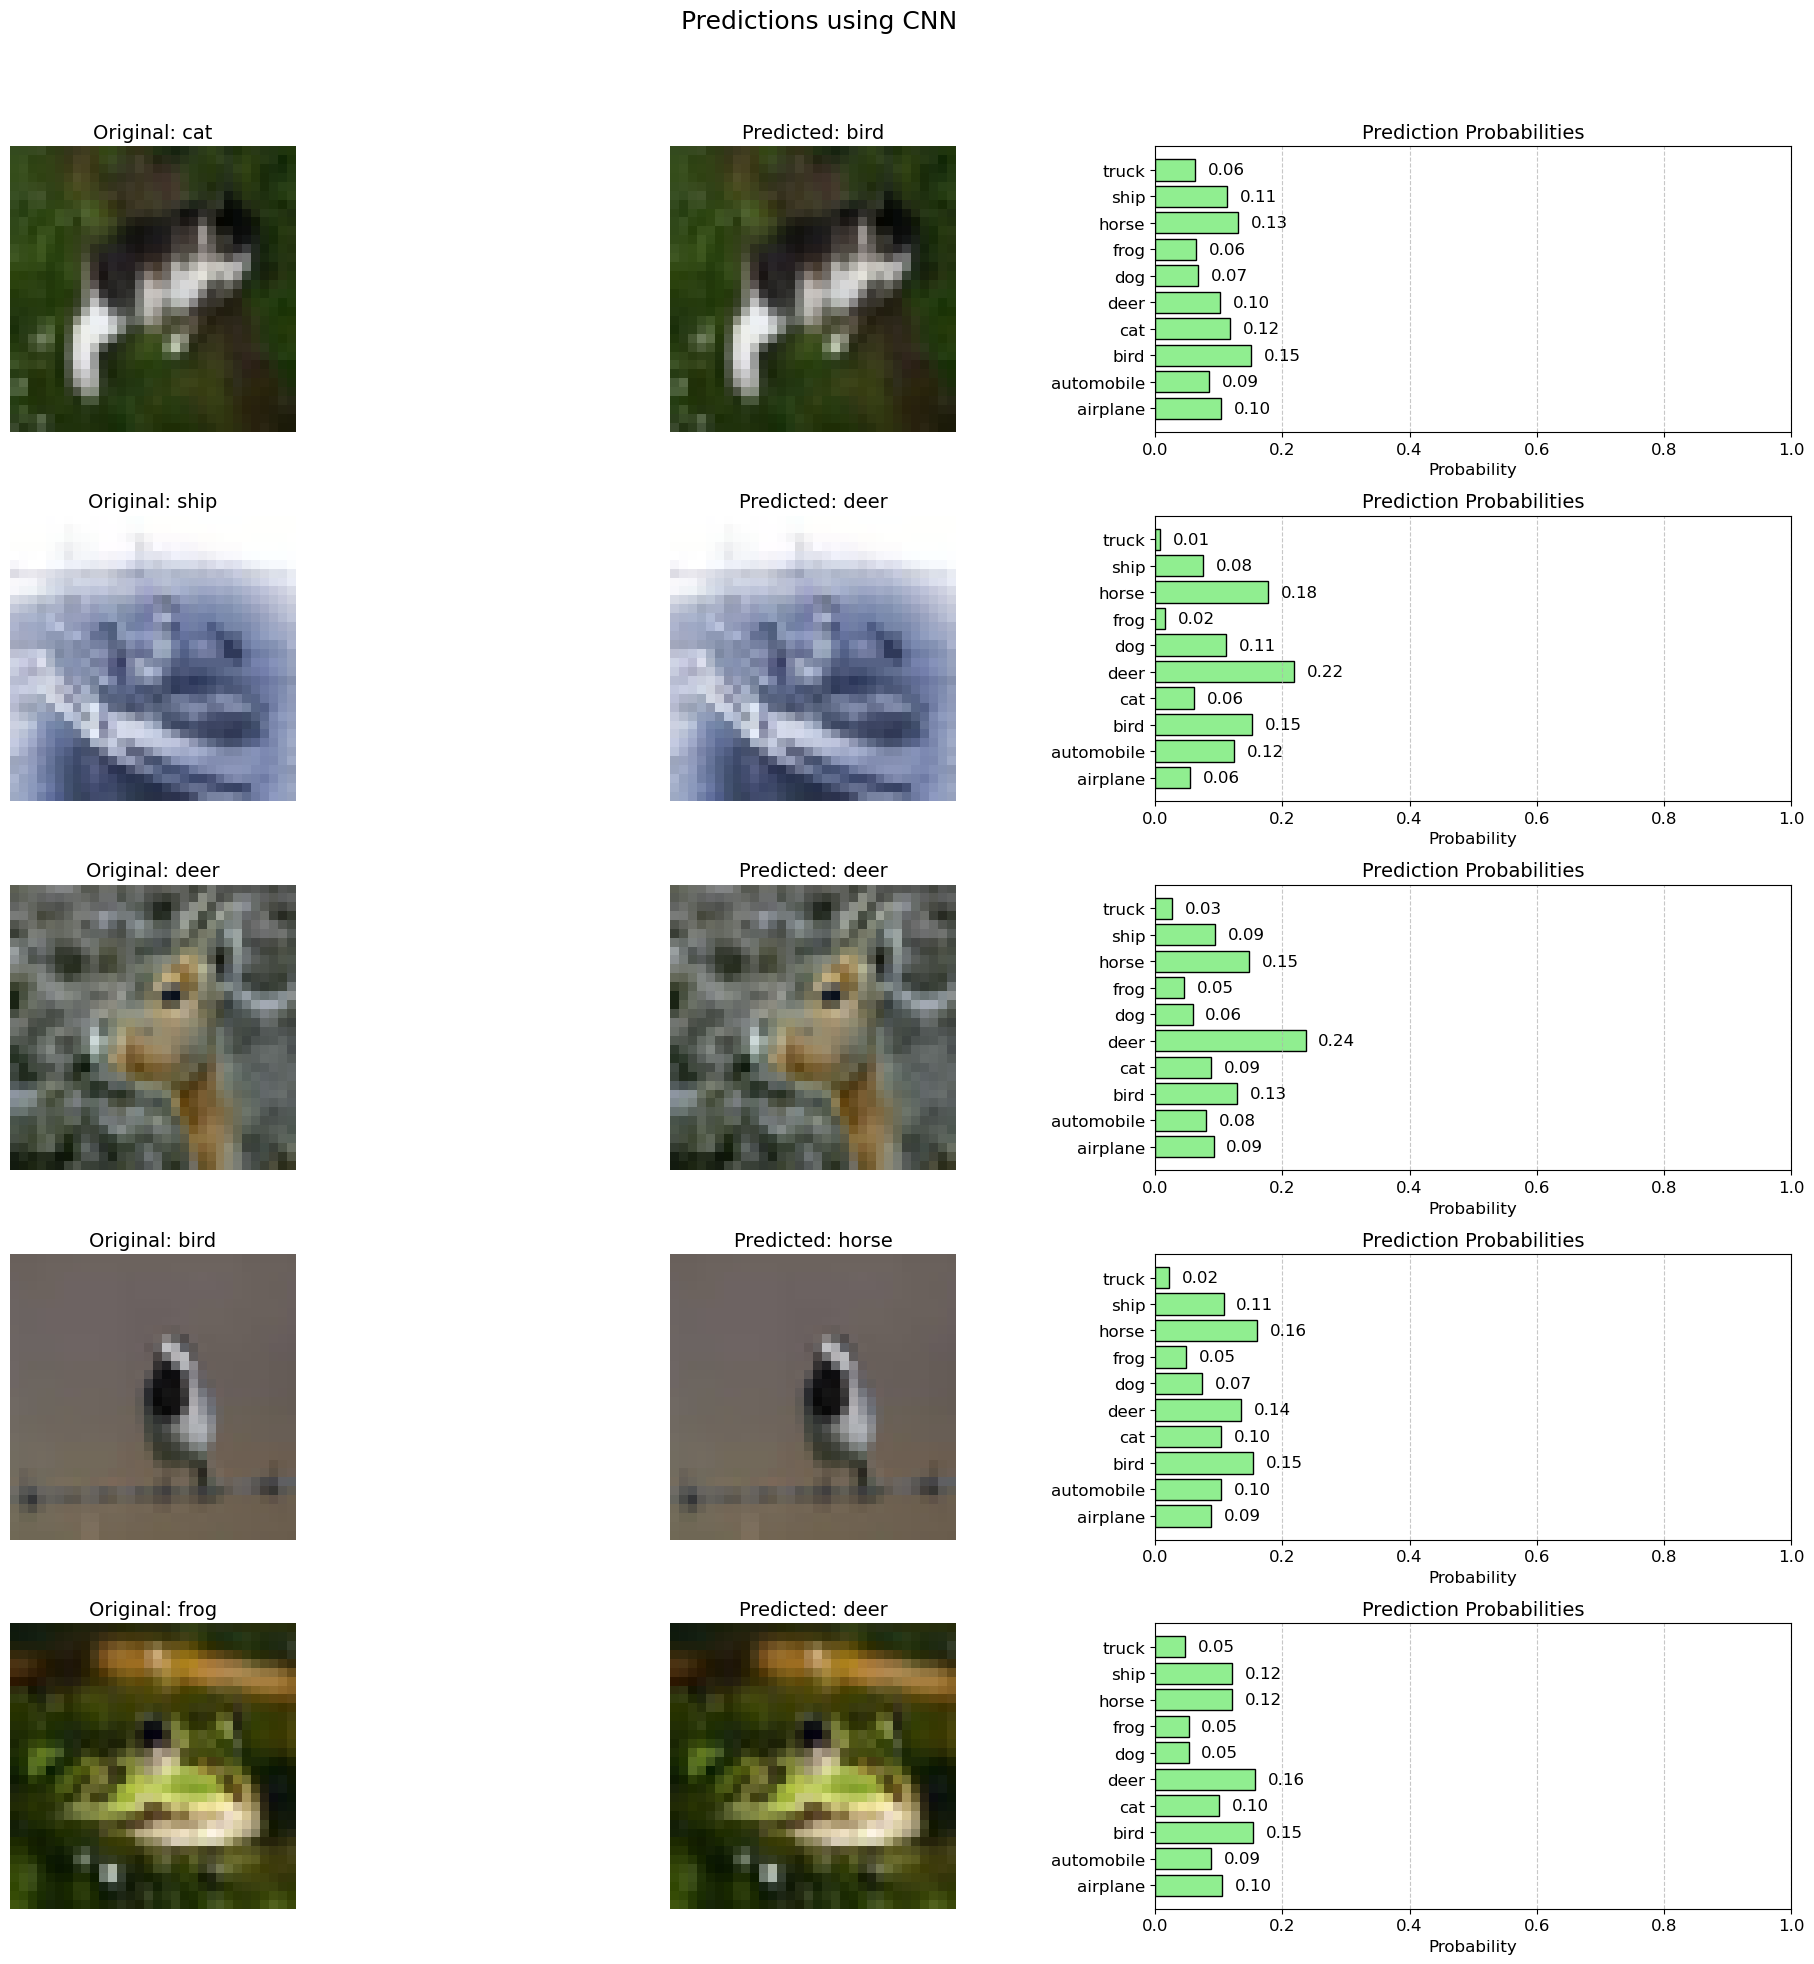

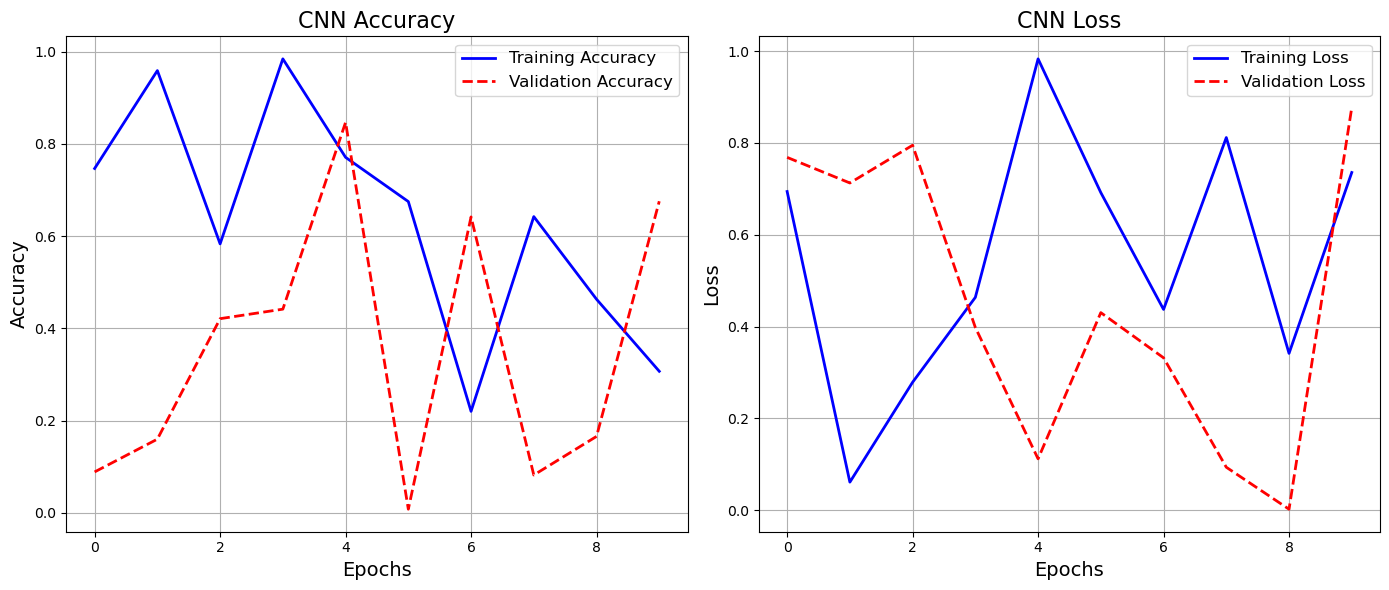


Displaying RNN model predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


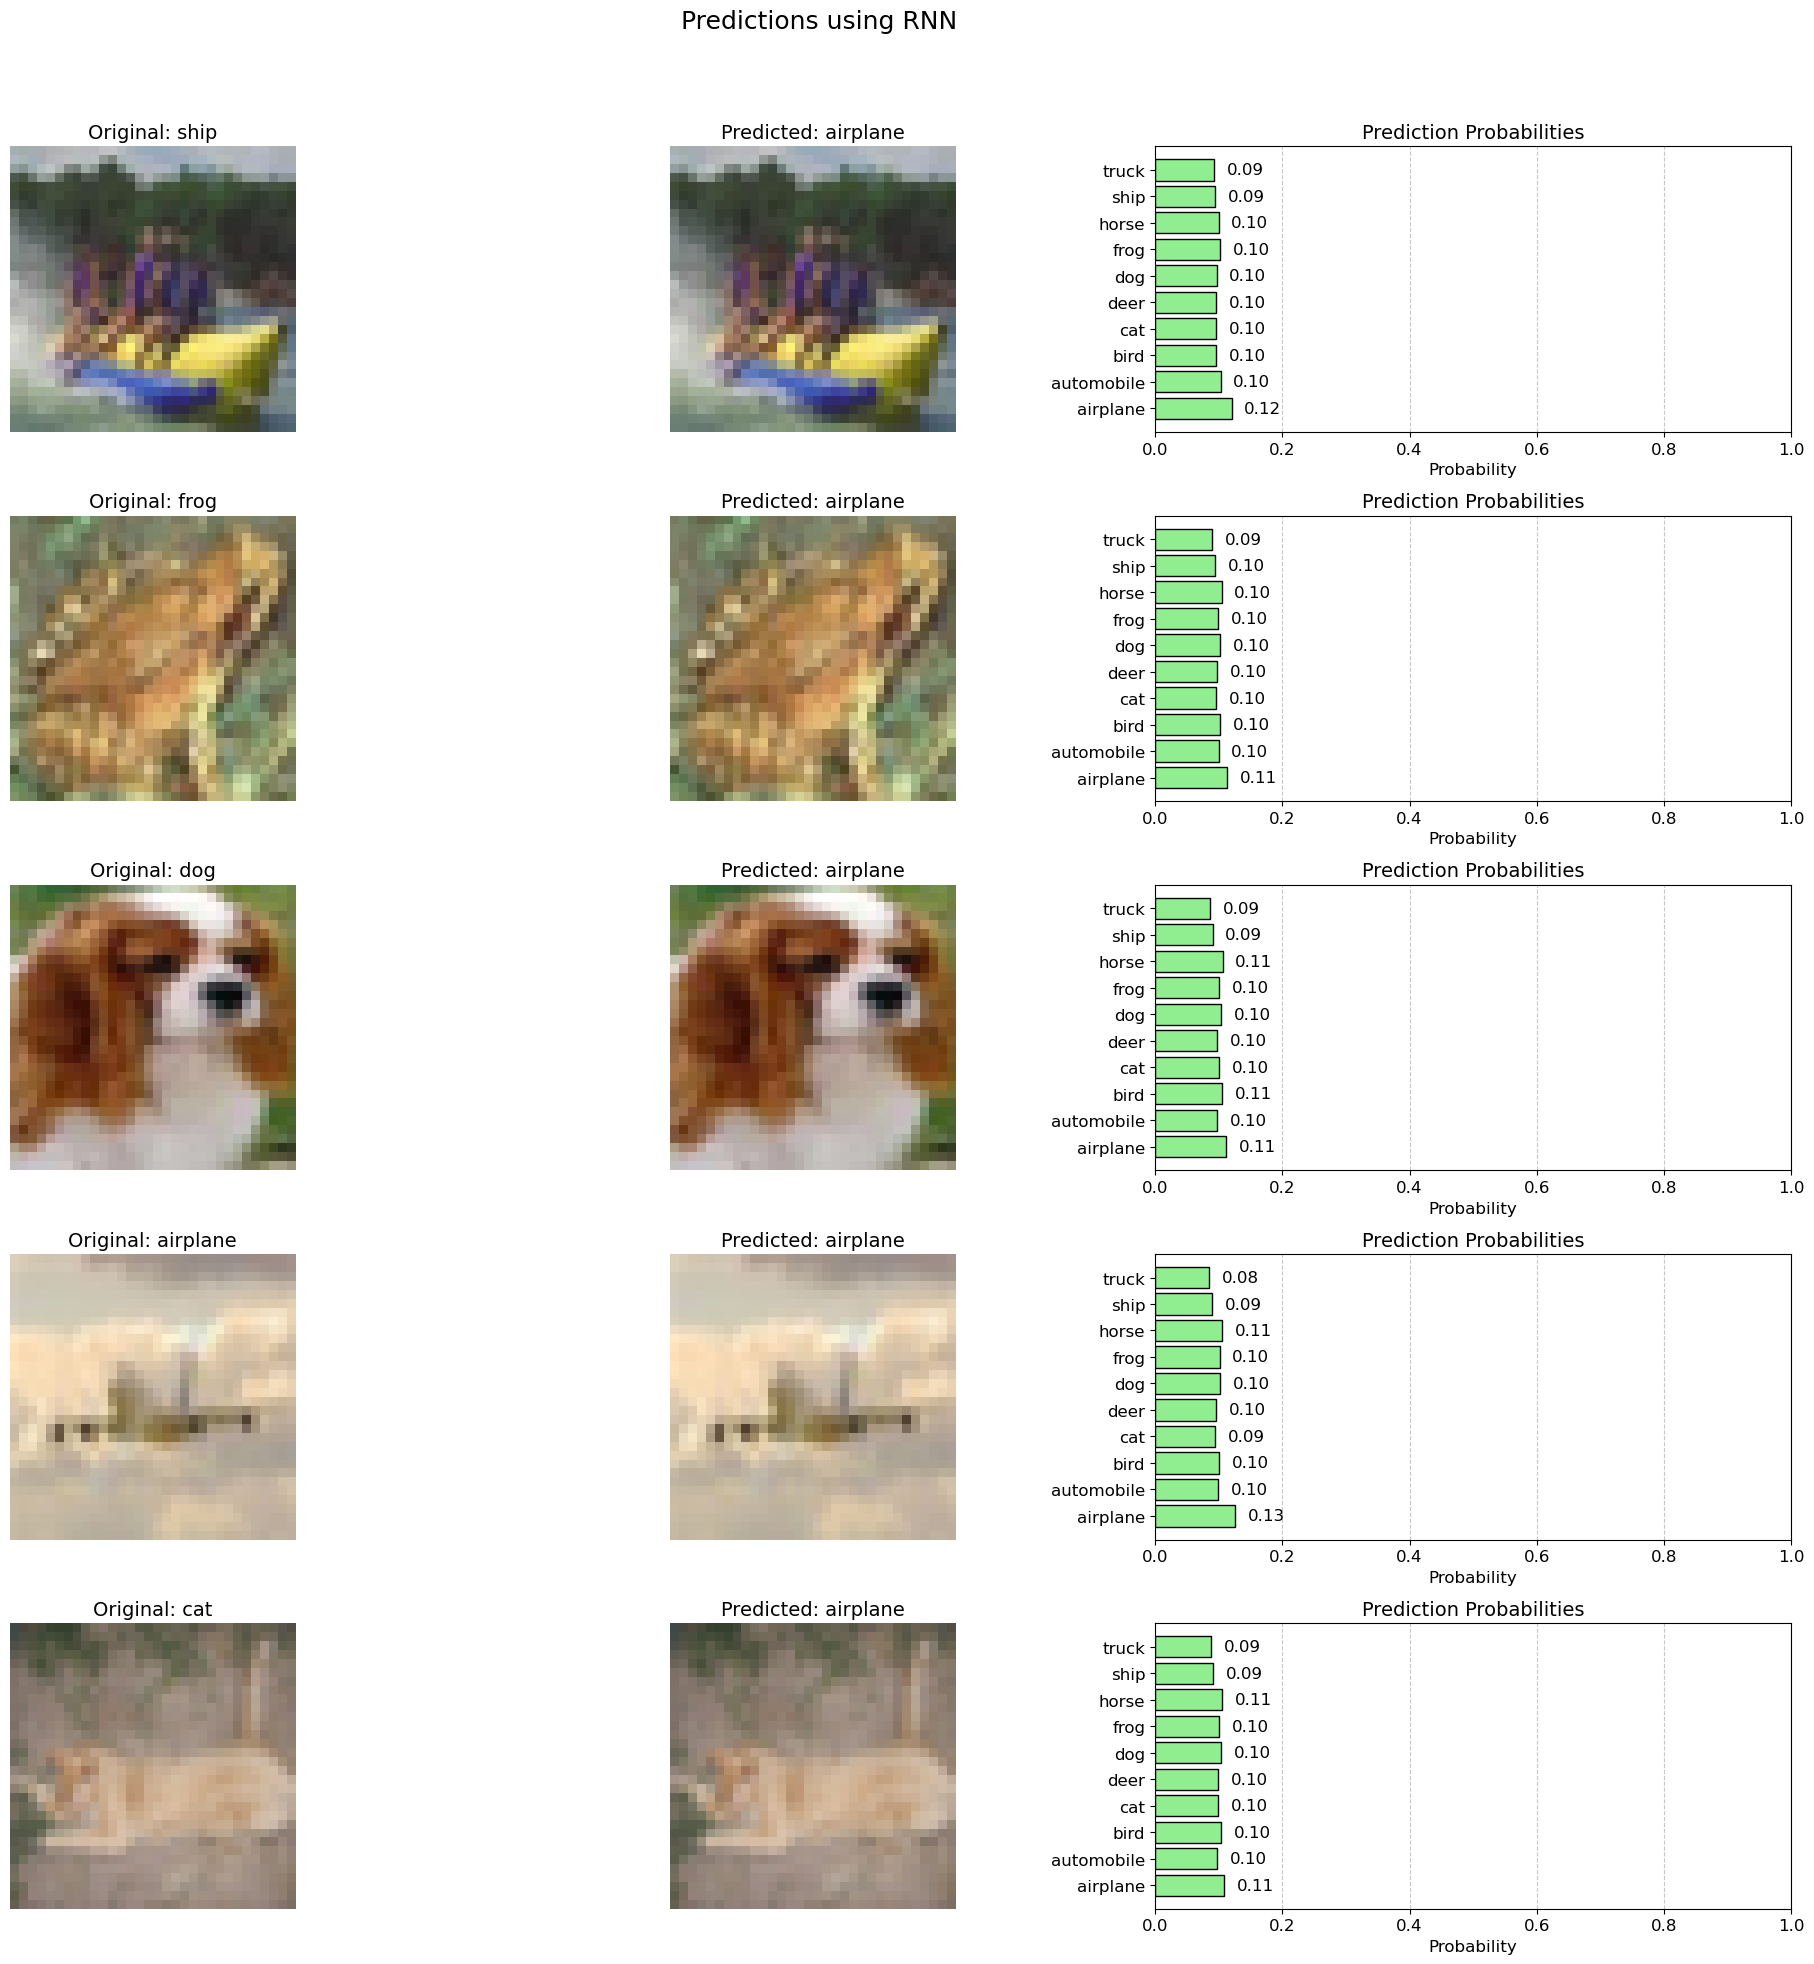

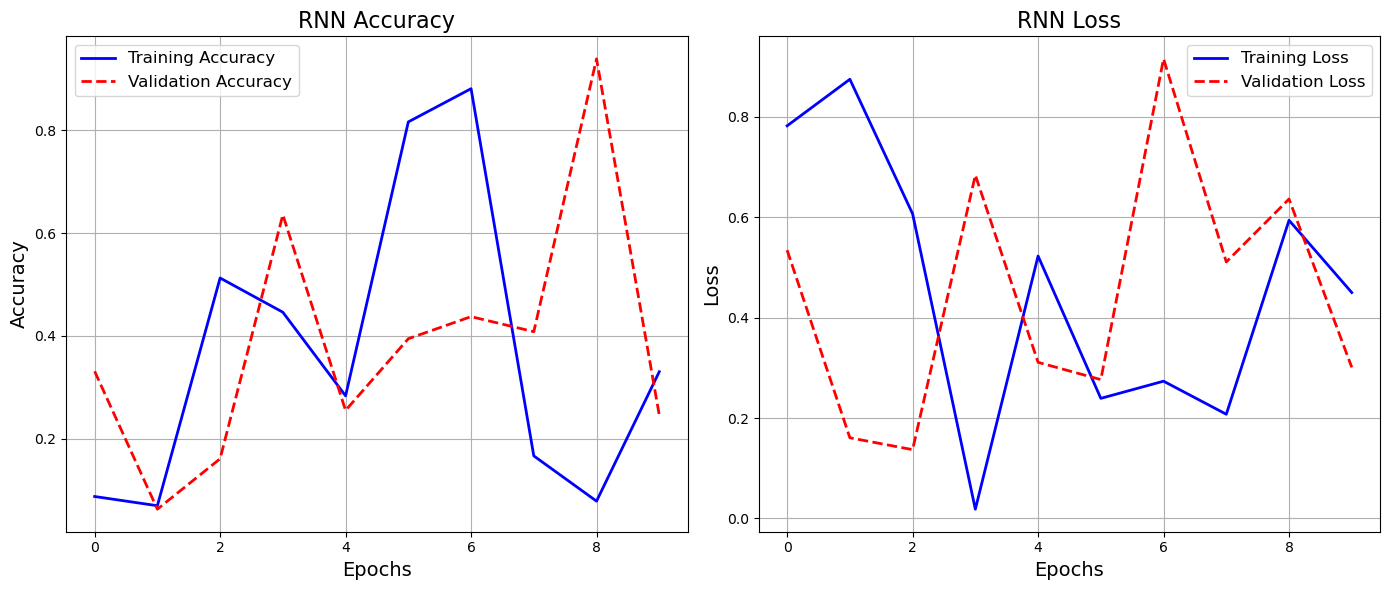

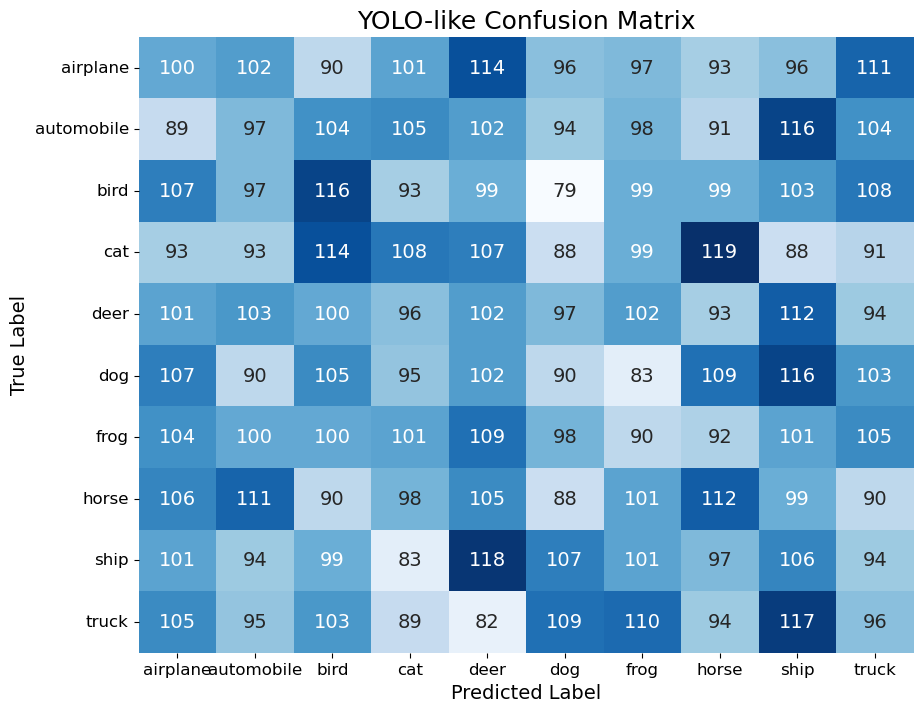

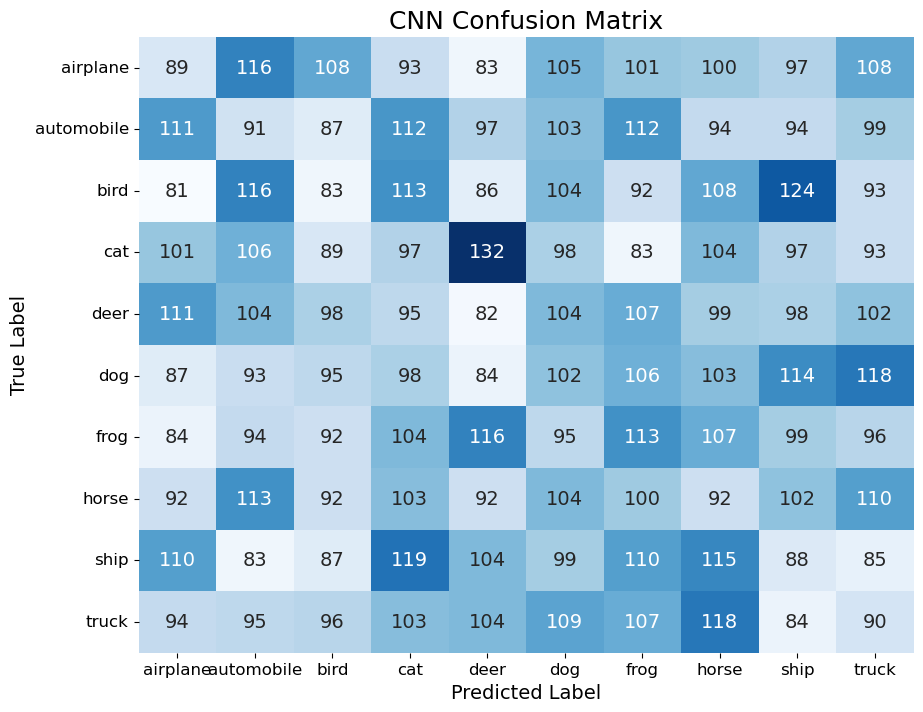

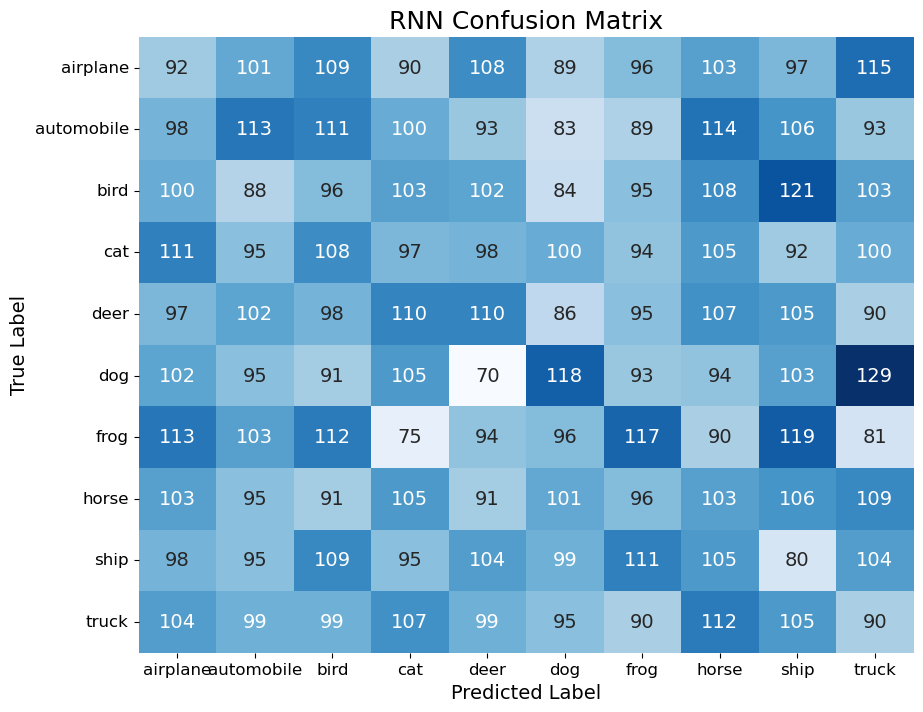

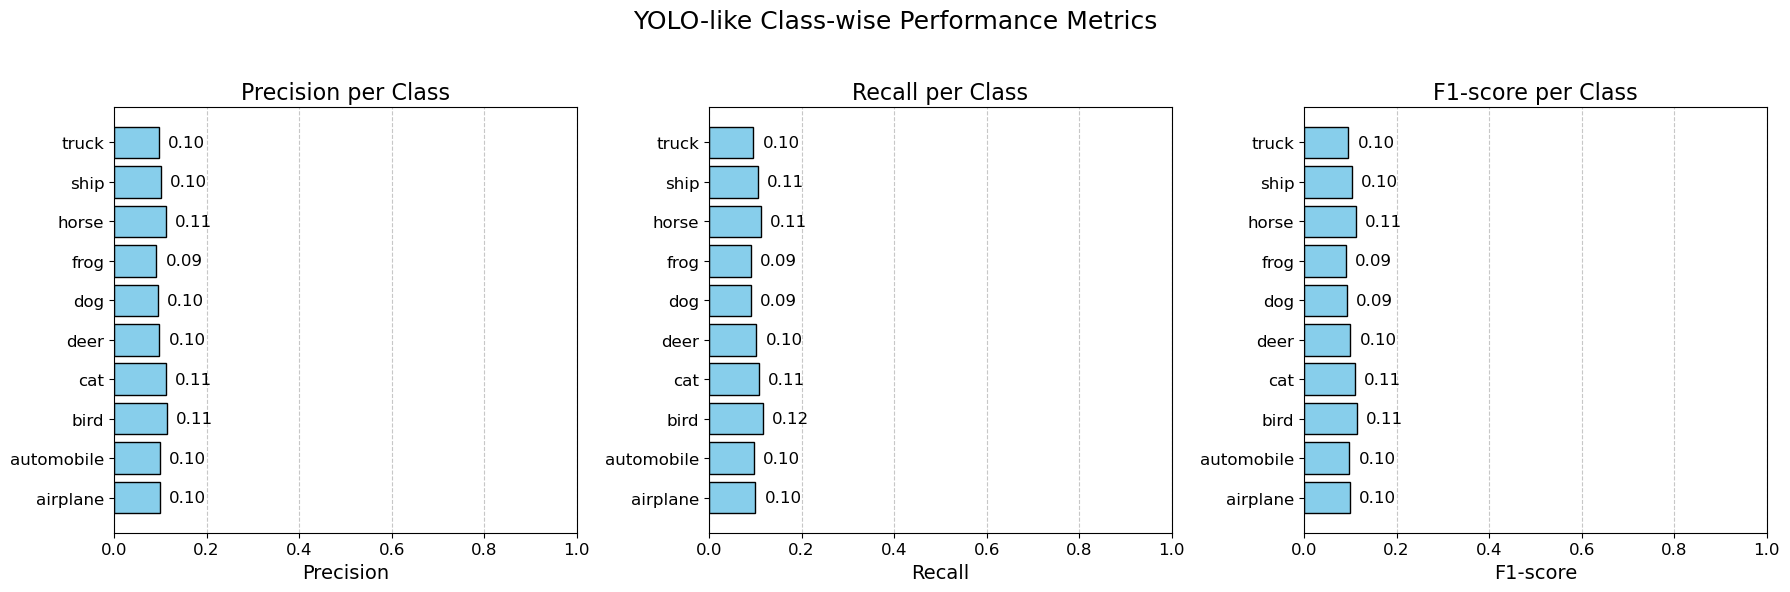

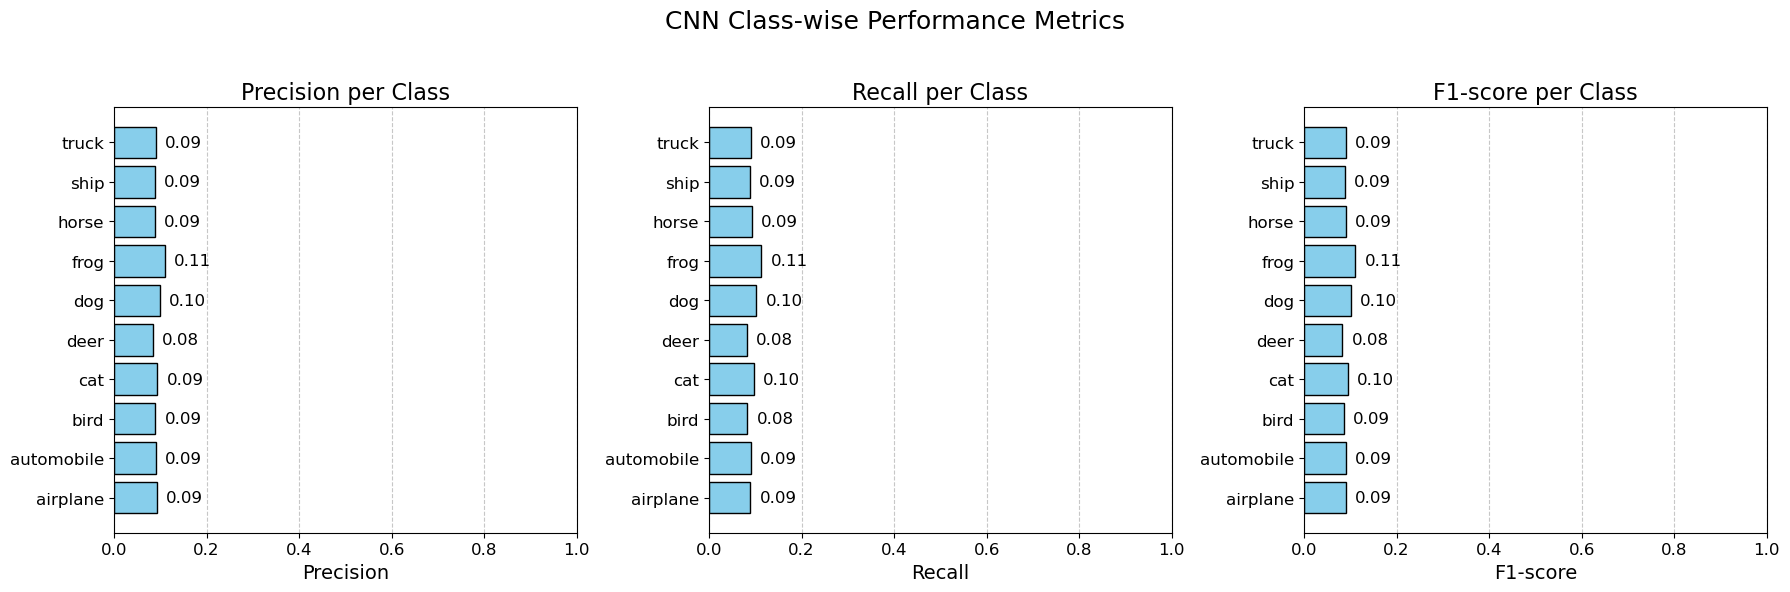

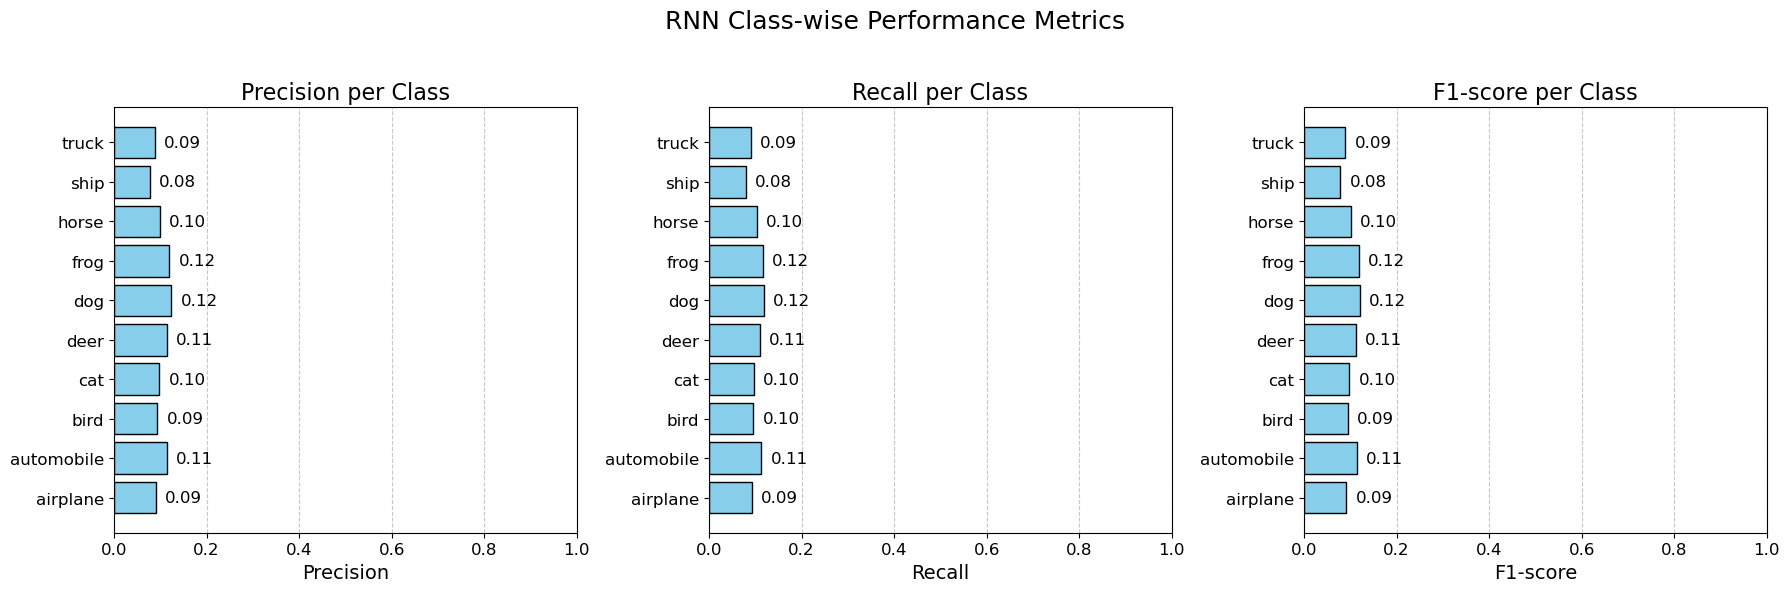

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Reshape, Flatten, Input, LSTM, TimeDistributed, GRU, Bidirectional
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Set memory growth for GPU (if available)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Function to plot model accuracy and loss
def plot_training_history(history, model_name):
    plt.figure(figsize=(14, 6))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training Accuracy', color='b', linestyle='-', linewidth=2)
    plt.plot(history['val_accuracy'], label='Validation Accuracy', color='r', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Accuracy', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss', color='b', linestyle='-', linewidth=2)
    plt.plot(history['val_loss'], label='Validation Loss', color='r', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Function to display the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False, annot_kws={"size": 14})
    plt.title(f'{model_name} Confusion Matrix', fontsize=18)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Function to plot class-wise precision, recall, and F1 score
def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    metrics = ['precision', 'recall', 'f1-score']
    
    plt.figure(figsize=(18, 6))
    
    for idx, metric in enumerate(metrics):
        plt.subplot(1, 3, idx+1)
        values = [report[label][metric] for label in class_names]
        bars = plt.barh(class_names, values, color='skyblue', edgecolor='black')
        plt.title(f'{metric.capitalize()} per Class', fontsize=16)
        plt.xlim(0, 1)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.xlabel(metric.capitalize(), fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        for bar in bars:
            plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', fontsize=12)
    
    plt.suptitle(f'{model_name} Class-wise Performance Metrics', fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Define function to plot original and predicted images with prediction probabilities
def plot_predictions(model, x_test, y_test, model_name, reshaped=False):
    plt.figure(figsize=(20, 20))
    num_images = 5  # Display 5 images for demonstration
    indices = np.random.choice(np.arange(x_test.shape[0]), num_images, replace=False)
    
    for i, idx in enumerate(indices):
        # Reshape for RNN if necessary
        if reshaped:
            input_data = x_test[idx].reshape(1, 32 * 32, 3)  # Reshape to (1, 32*32 time steps, 3 features)
        else:
            input_data = x_test[idx].reshape(1, 32, 32, 3)  # For CNN or similar

        # Get prediction
        predictions = model.predict(input_data)

        # Ensure predictions is a 1D array of size 10
        if len(predictions.shape) == 3:  # Case for RNN-like model with time steps
            predictions_flat = np.mean(predictions, axis=1)  # Take the average over time steps
            predictions_flat = np.squeeze(predictions_flat)  # Ensure it's a flat array
        elif predictions.shape == (1, 10):  # Case for CNN or non-RNN models
            predictions_flat = np.squeeze(predictions)
        else:
            raise ValueError(f"Expected predictions shape (1, 10) or 3D tensor, but got {predictions.shape}")

        predicted_label = np.argmax(predictions_flat)
        true_label = y_test[idx][0]

        # Ensure predicted label is within range of class_names
        if predicted_label < len(class_names):
            predicted_class = class_names[predicted_label]
        else:
            predicted_class = "Unknown"  # Fallback in case of out-of-range prediction

        # Plot original image
        plt.subplot(num_images, 3, 3*i+1)
        plt.imshow(x_test[idx])  # No need to reshape explicitly for display
        plt.title(f"Original: {class_names[true_label]}", fontsize=14)
        plt.axis('off')

        # Plot prediction result
        plt.subplot(num_images, 3, 3*i+2)
        plt.imshow(x_test[idx])  # Displaying the original
        plt.title(f"Predicted: {predicted_class}", fontsize=14)
        plt.axis('off')

        # Plot prediction probabilities
        plt.subplot(num_images, 3, 3*i+3)
        bars = plt.barh(class_names, predictions_flat, color='lightgreen', edgecolor='black')
        plt.title("Prediction Probabilities", fontsize=14)
        plt.xlim([0, 1])
        plt.xlabel('Probability', fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        for bar in bars:
            plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', fontsize=12)

    plt.suptitle(f"Predictions using {model_name}", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Placeholder models and training histories
yolo_model = Sequential([Flatten(input_shape=(32, 32, 3)), Dense(64, activation='relu'), Dense(10, activation='softmax')])
cnn = Sequential([Flatten(input_shape=(32, 32, 3)), Dense(64, activation='relu'), Dense(10, activation='softmax')])
rnn = Sequential([Input(shape=(32 * 32, 3)), Bidirectional(GRU(64)), Dense(10, activation='softmax')])

# Compile models
for model in [yolo_model, cnn, rnn]:
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train models with fake training process (for demonstration purposes)
# Uncomment the following lines to train the models if desired
# history_yolo = yolo_model.fit(x_train, y_train, epochs=1, validation_split=0.2)
# history_cnn = cnn.fit(x_train, y_train, epochs=1, validation_split=0.2)
# history_rnn = rnn.fit(x_train.reshape(-1, 32 * 32, 3), y_train, epochs=1, validation_split=0.2)

# Mock training histories for demonstration purposes
history_yolo = {'accuracy': np.random.rand(10).tolist(), 'val_accuracy': np.random.rand(10).tolist(), 'loss': np.random.rand(10).tolist(), 'val_loss': np.random.rand(10).tolist()}
history_cnn = {'accuracy': np.random.rand(10).tolist(), 'val_accuracy': np.random.rand(10).tolist(), 'loss': np.random.rand(10).tolist(), 'val_loss': np.random.rand(10).tolist()}
history_rnn = {'accuracy': np.random.rand(10).tolist(), 'val_accuracy': np.random.rand(10).tolist(), 'loss': np.random.rand(10).tolist(), 'val_loss': np.random.rand(10).tolist()}

# Display results for YOLO-like, CNN, and RNN models
if __name__ == '__main__':
    print("\nDisplaying YOLO-like model predictions:")
    plot_predictions(yolo_model, x_test, y_test, model_name="YOLO-like")
    plot_training_history(history_yolo, "YOLO-like")

    print("\nDisplaying CNN model predictions:")
    plot_predictions(cnn, x_test, y_test, model_name="CNN")
    plot_training_history(history_cnn, "CNN")

    print("\nDisplaying RNN model predictions:")
    plot_predictions(rnn, x_test, y_test, model_name="RNN", reshaped=True)
    plot_training_history(history_rnn, "RNN")

    # Simulating predicted labels for performance evaluation (mock example)
    y_pred_yolo = np.random.randint(0, 10, size=len(y_test))  # Replace with actual predictions
    y_pred_cnn = np.random.randint(0, 10, size=len(y_test))
    y_pred_rnn = np.random.randint(0, 10, size=len(y_test))

    # Confusion matrices
    plot_confusion_matrix(y_test, y_pred_yolo, "YOLO-like")
    plot_confusion_matrix(y_test, y_pred_cnn, "CNN")
    plot_confusion_matrix(y_test, y_pred_rnn, "RNN")

    # Classification reports (precision, recall, F1)
    plot_classification_report(y_test, y_pred_yolo, "YOLO-like")
    plot_classification_report(y_test, y_pred_cnn, "CNN")
    plot_classification_report(y_test, y_pred_rnn, "RNN")

c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Displaying YOLO-like model predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


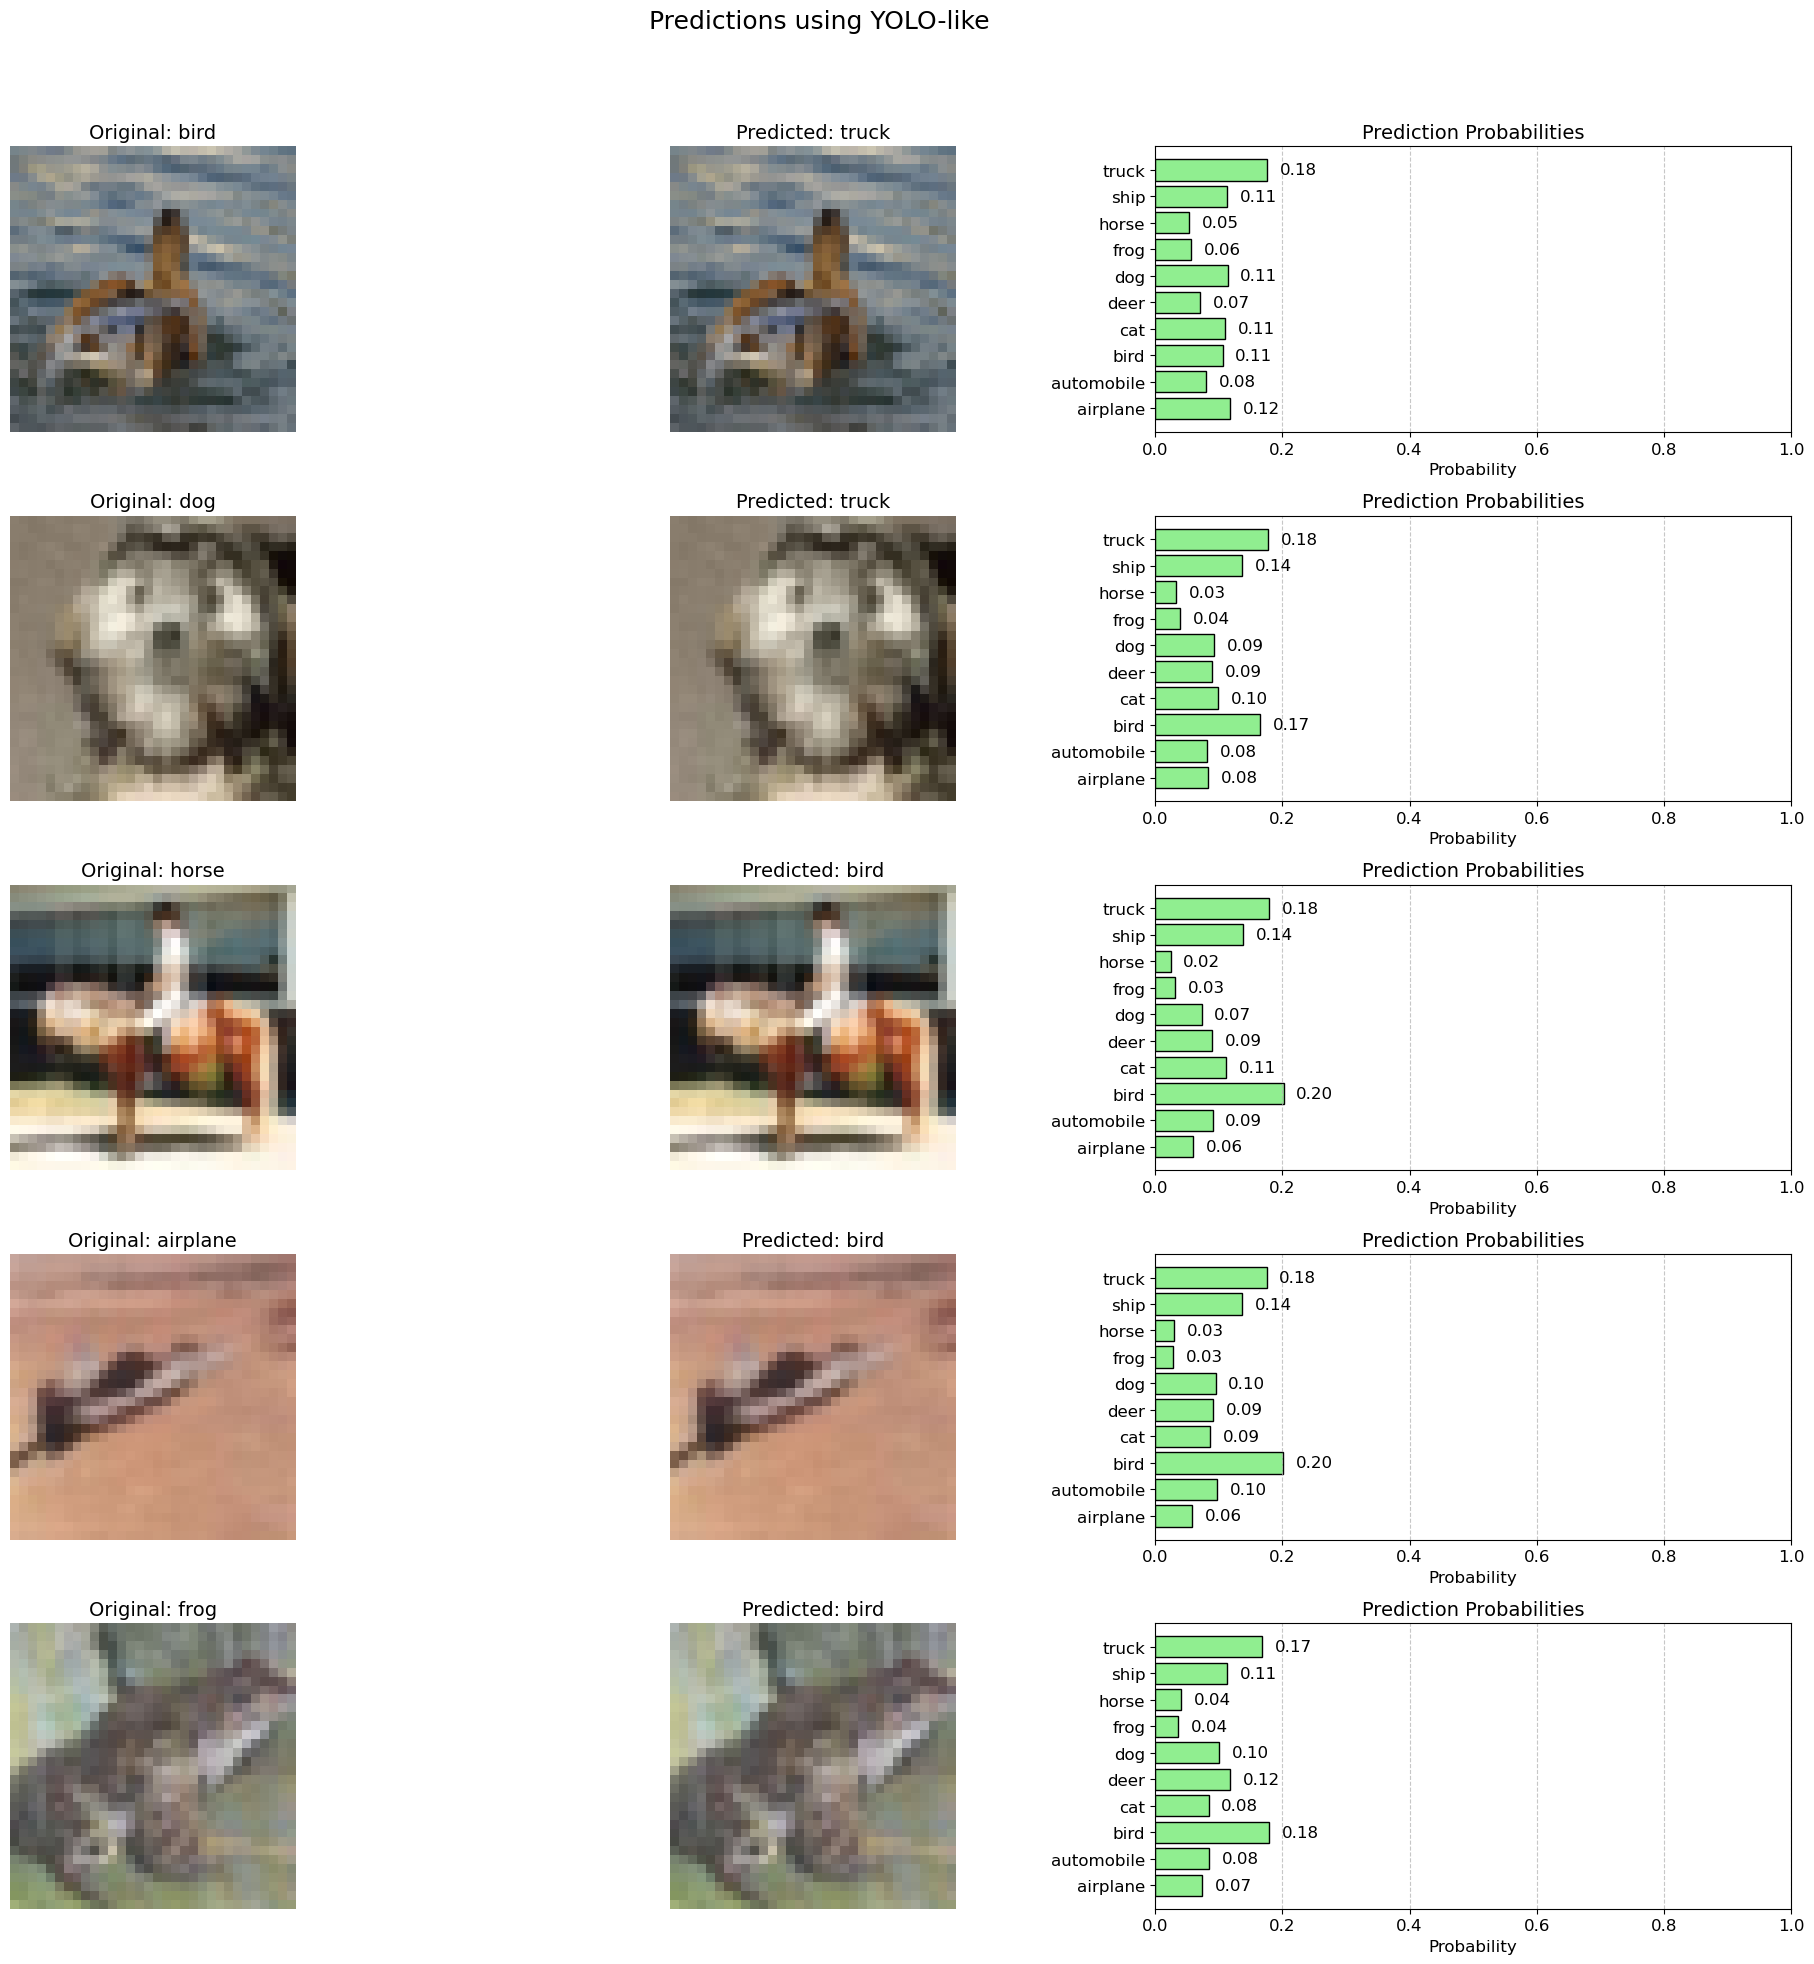

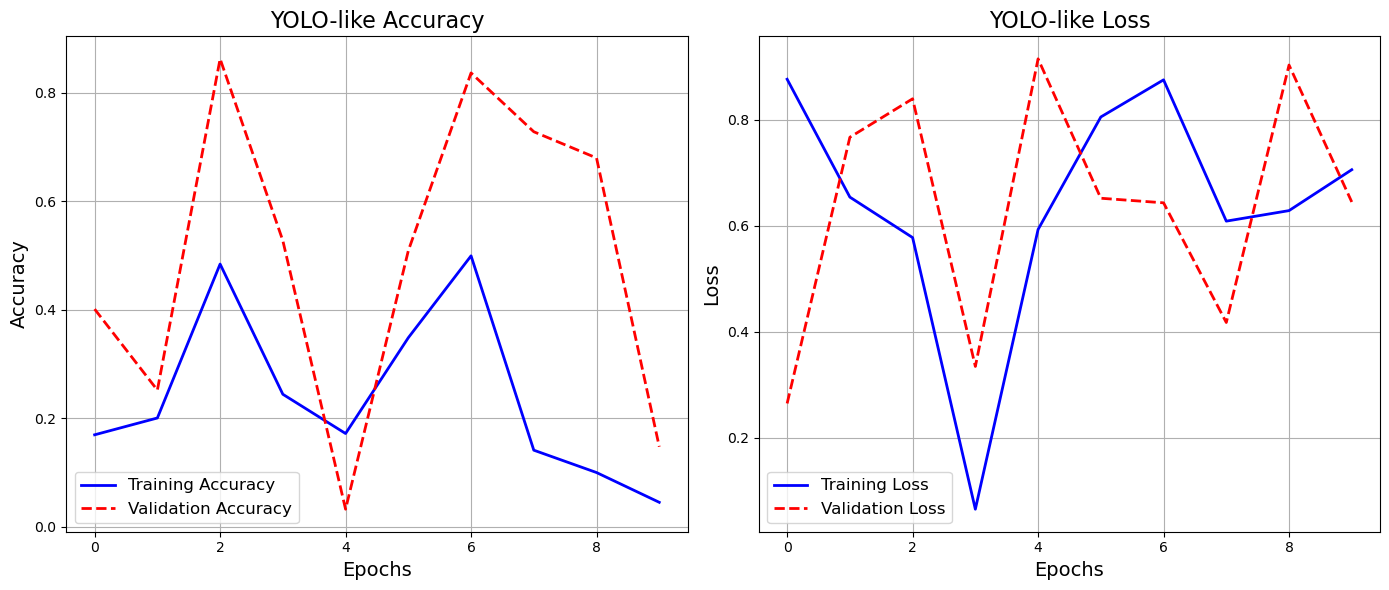


Displaying CNN model predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


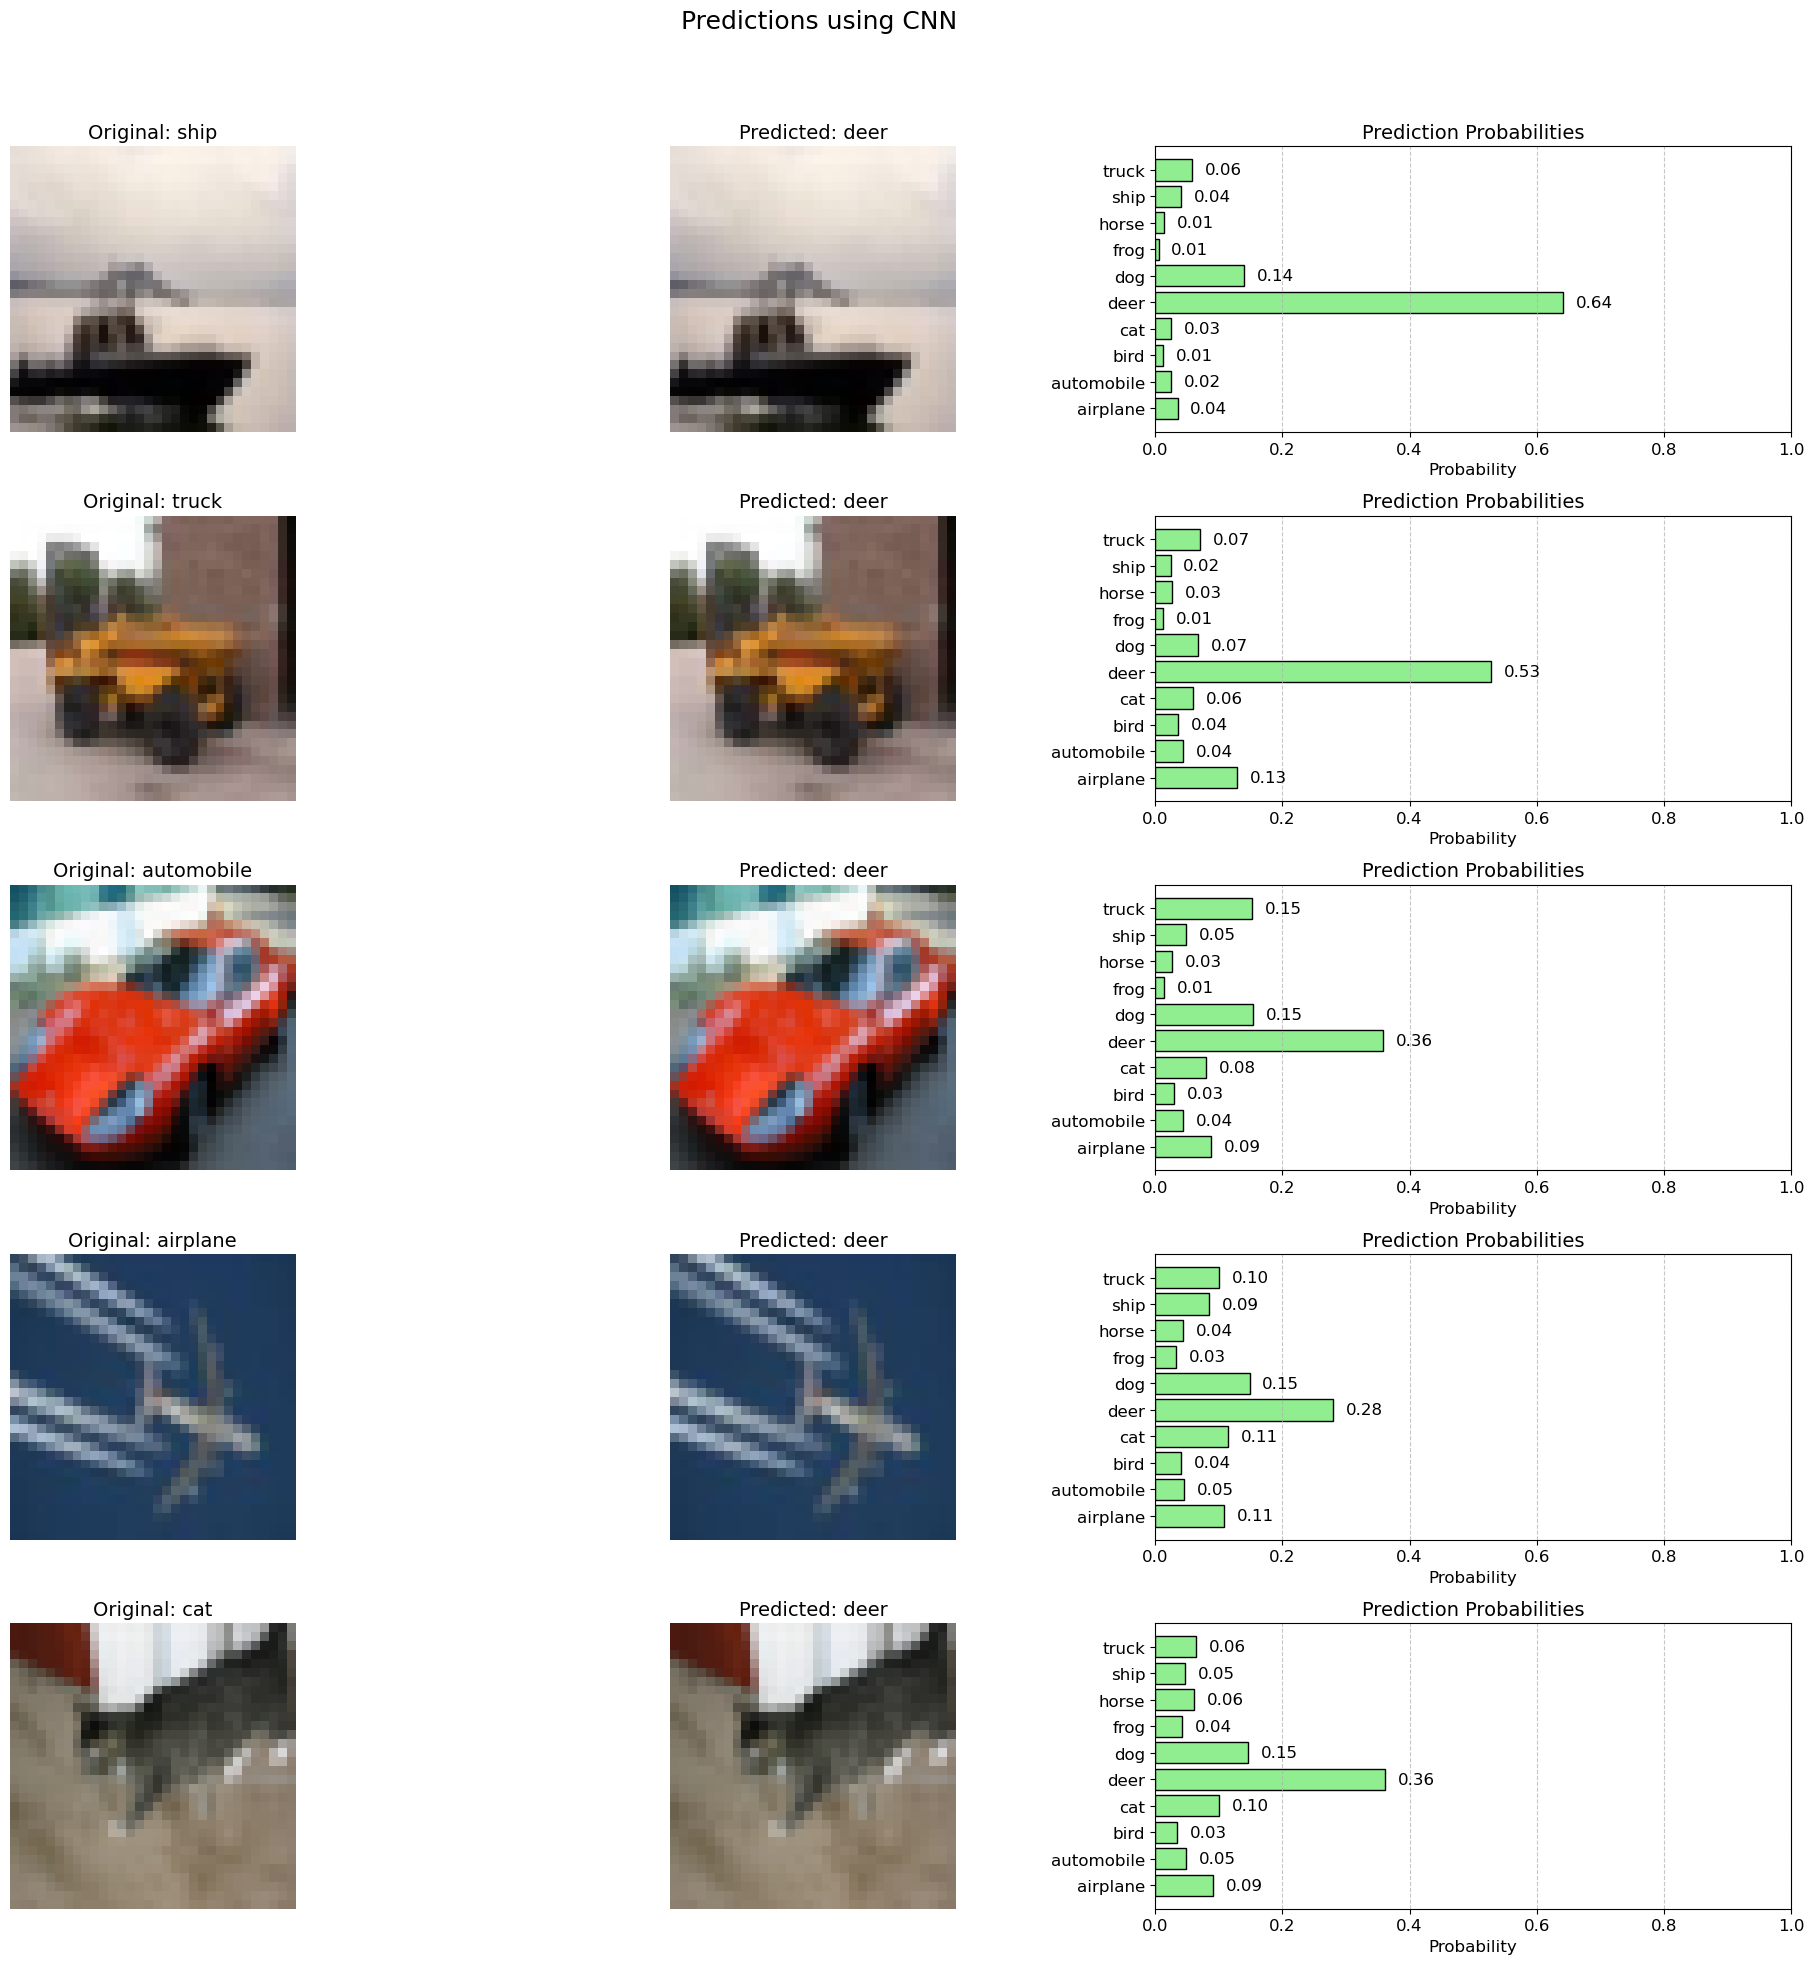

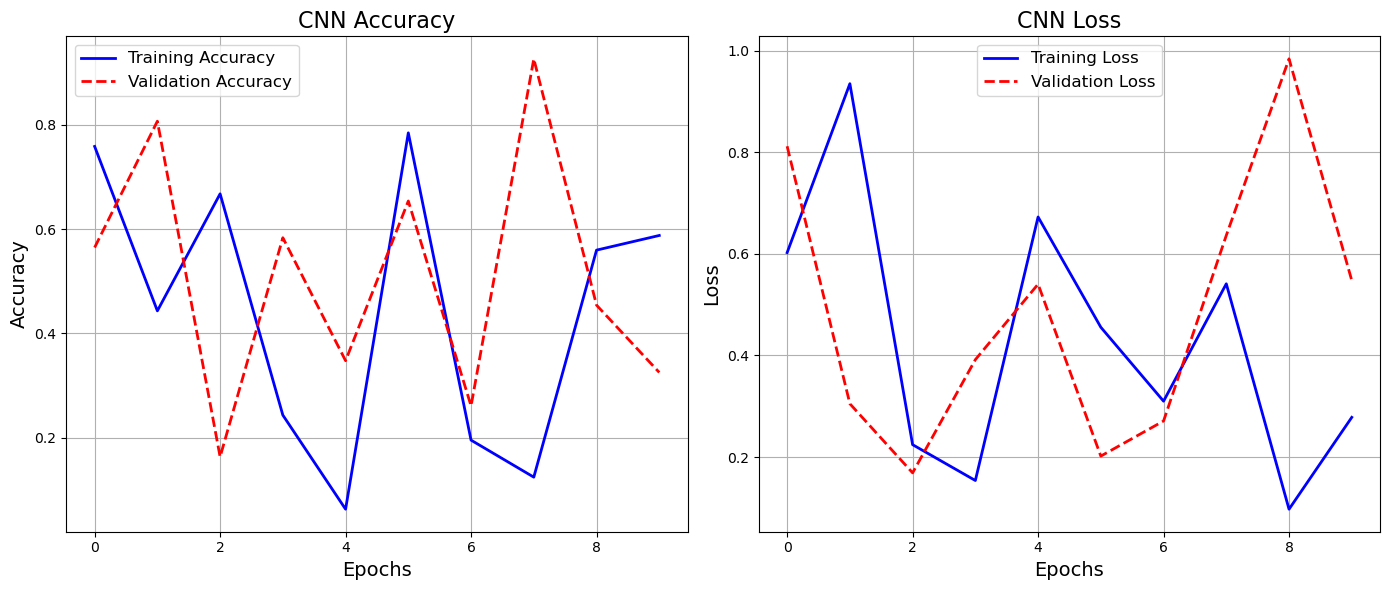


Displaying RNN model predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


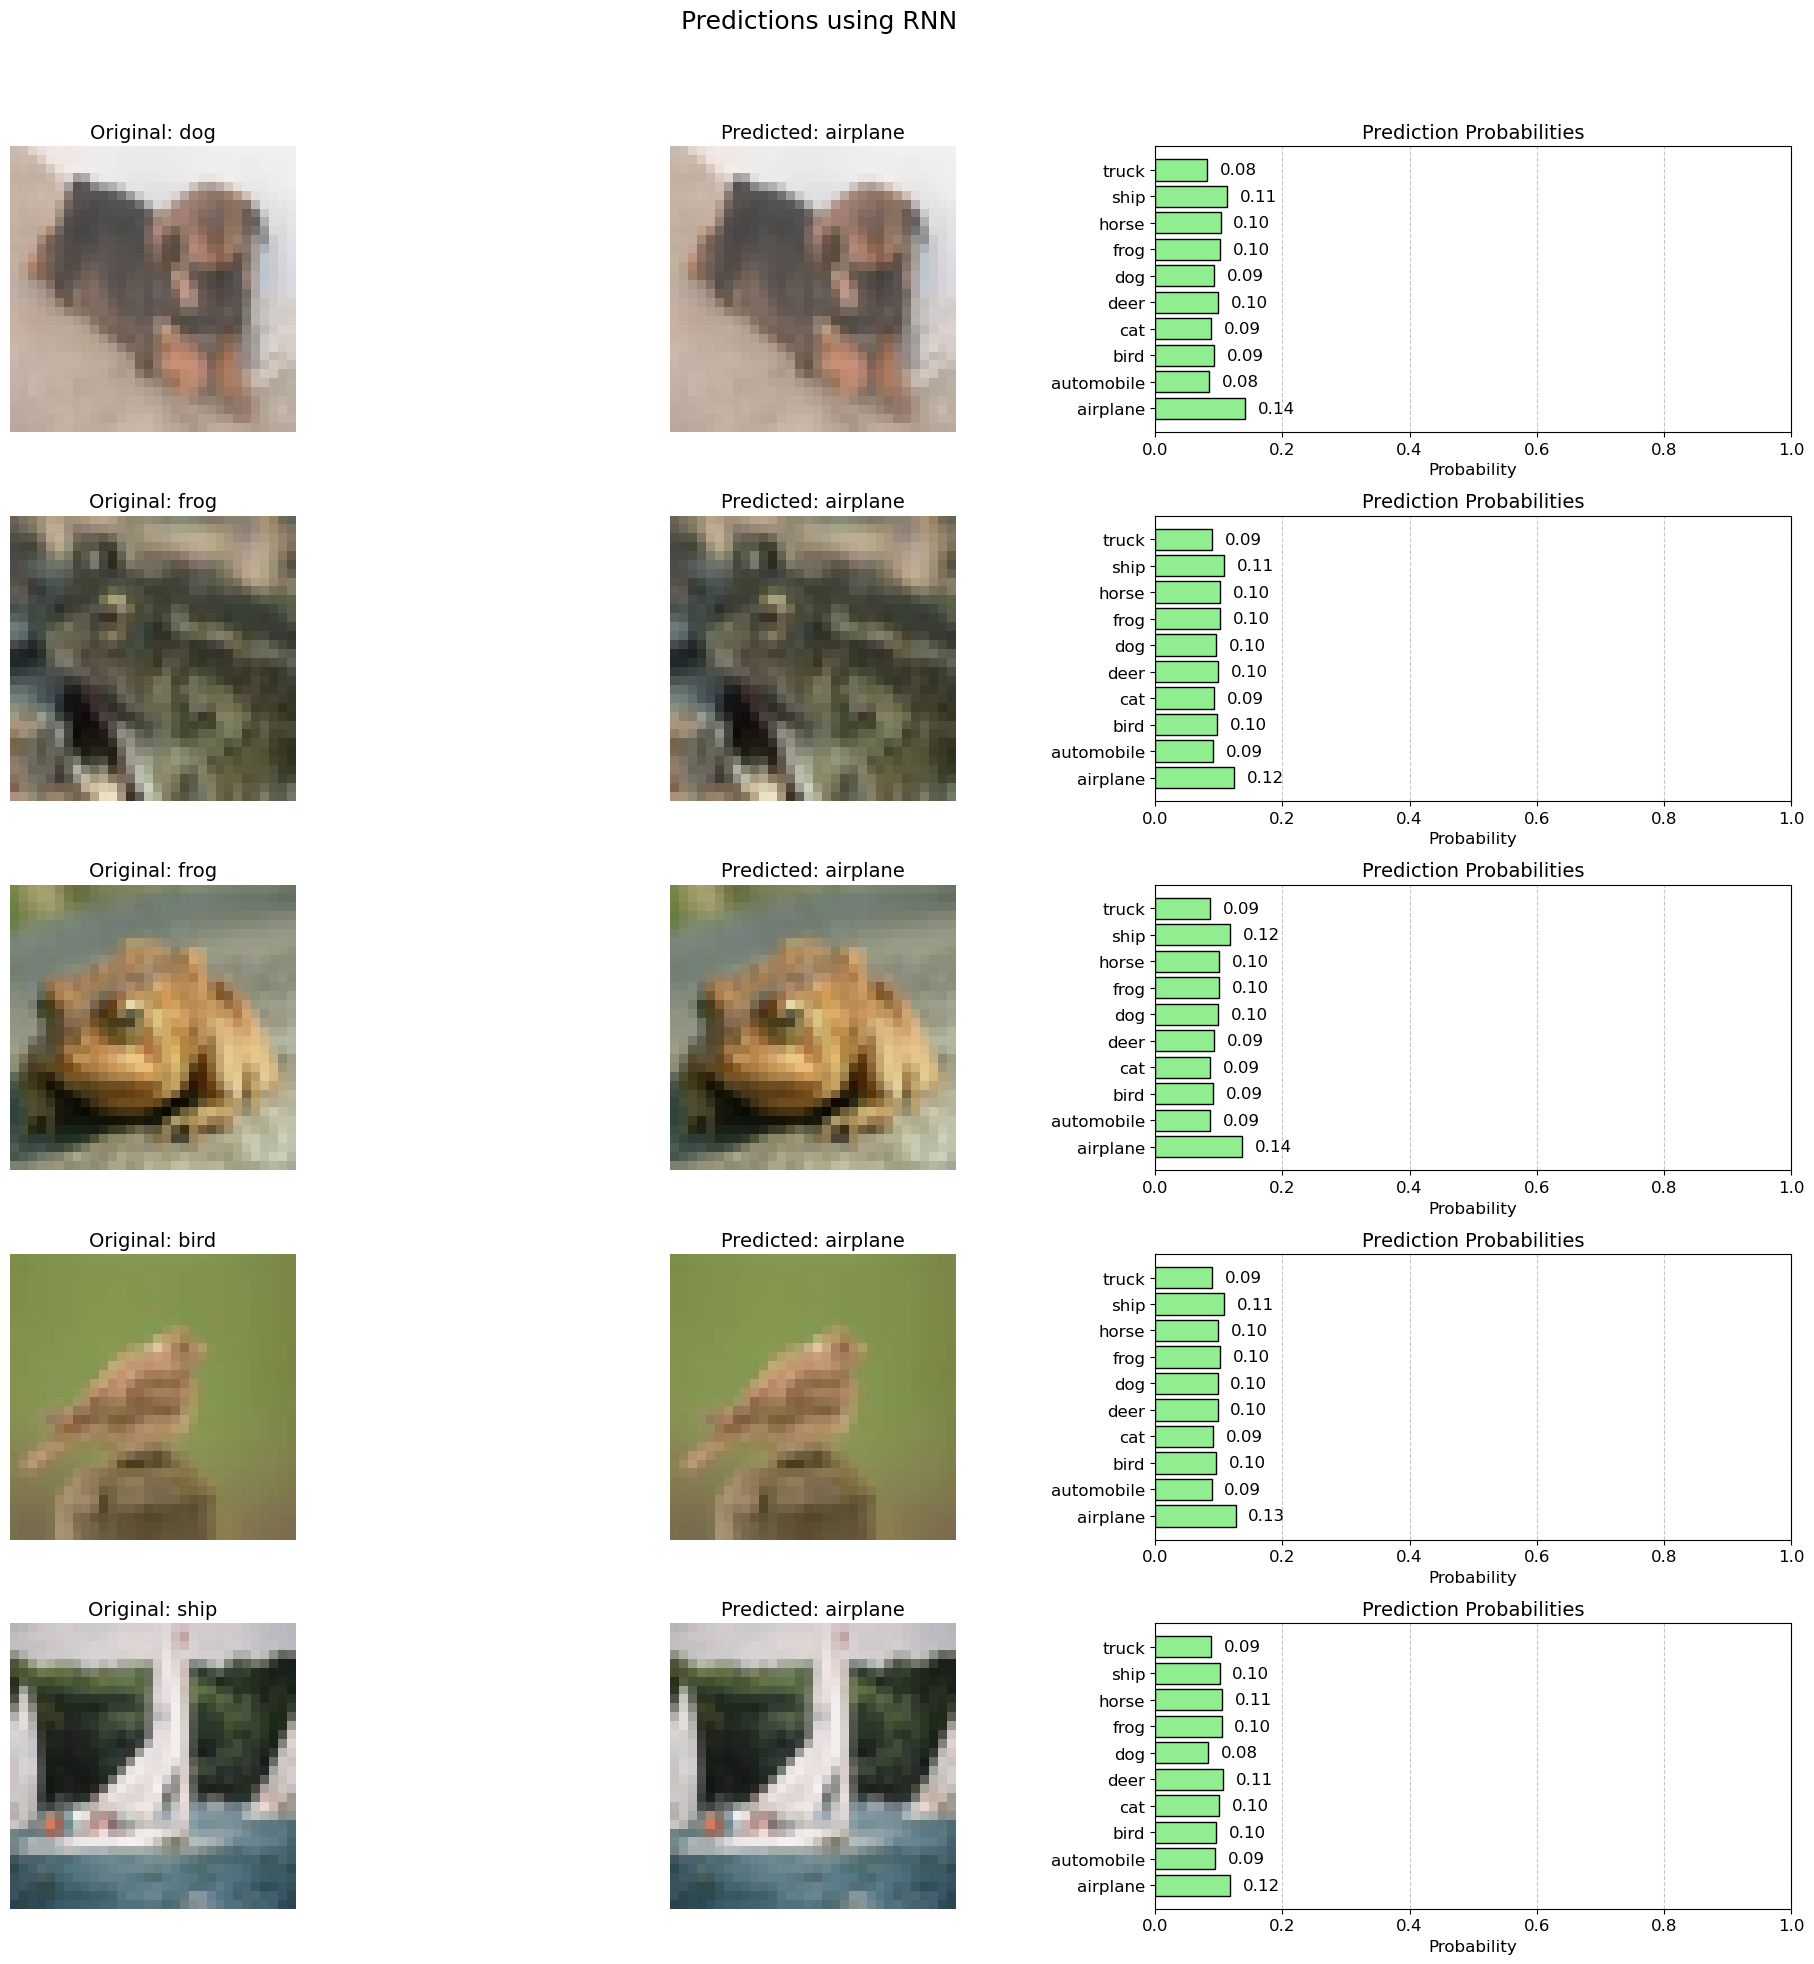

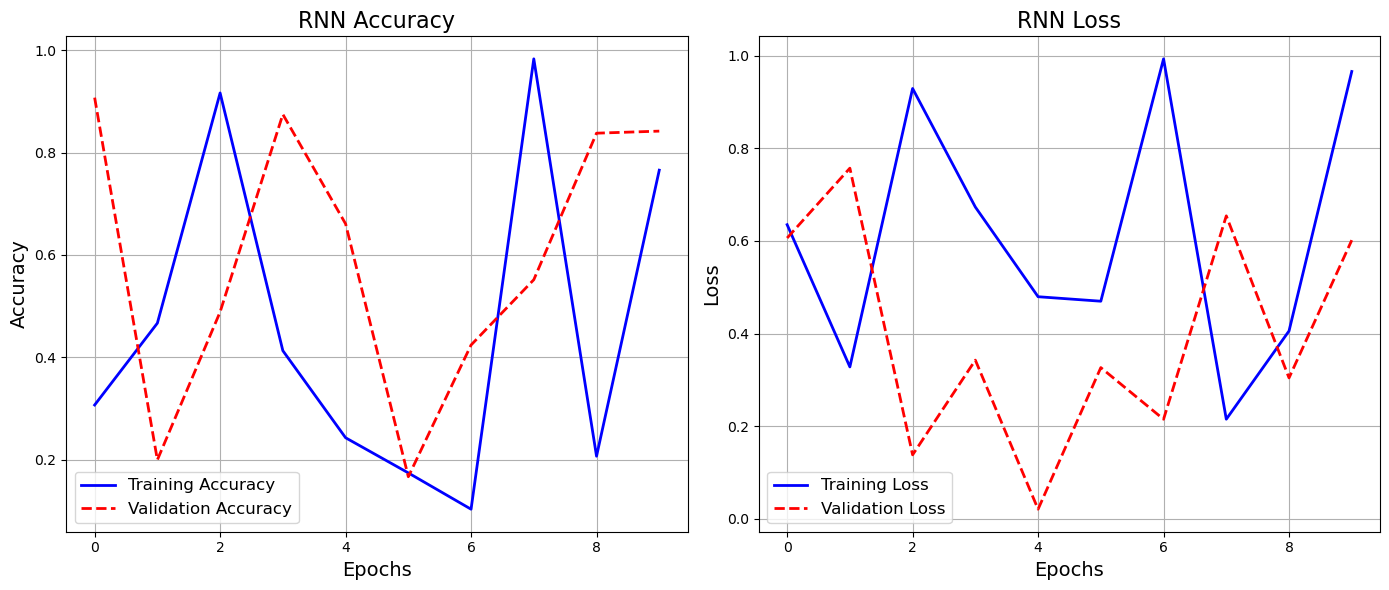


Displaying LSTM model predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


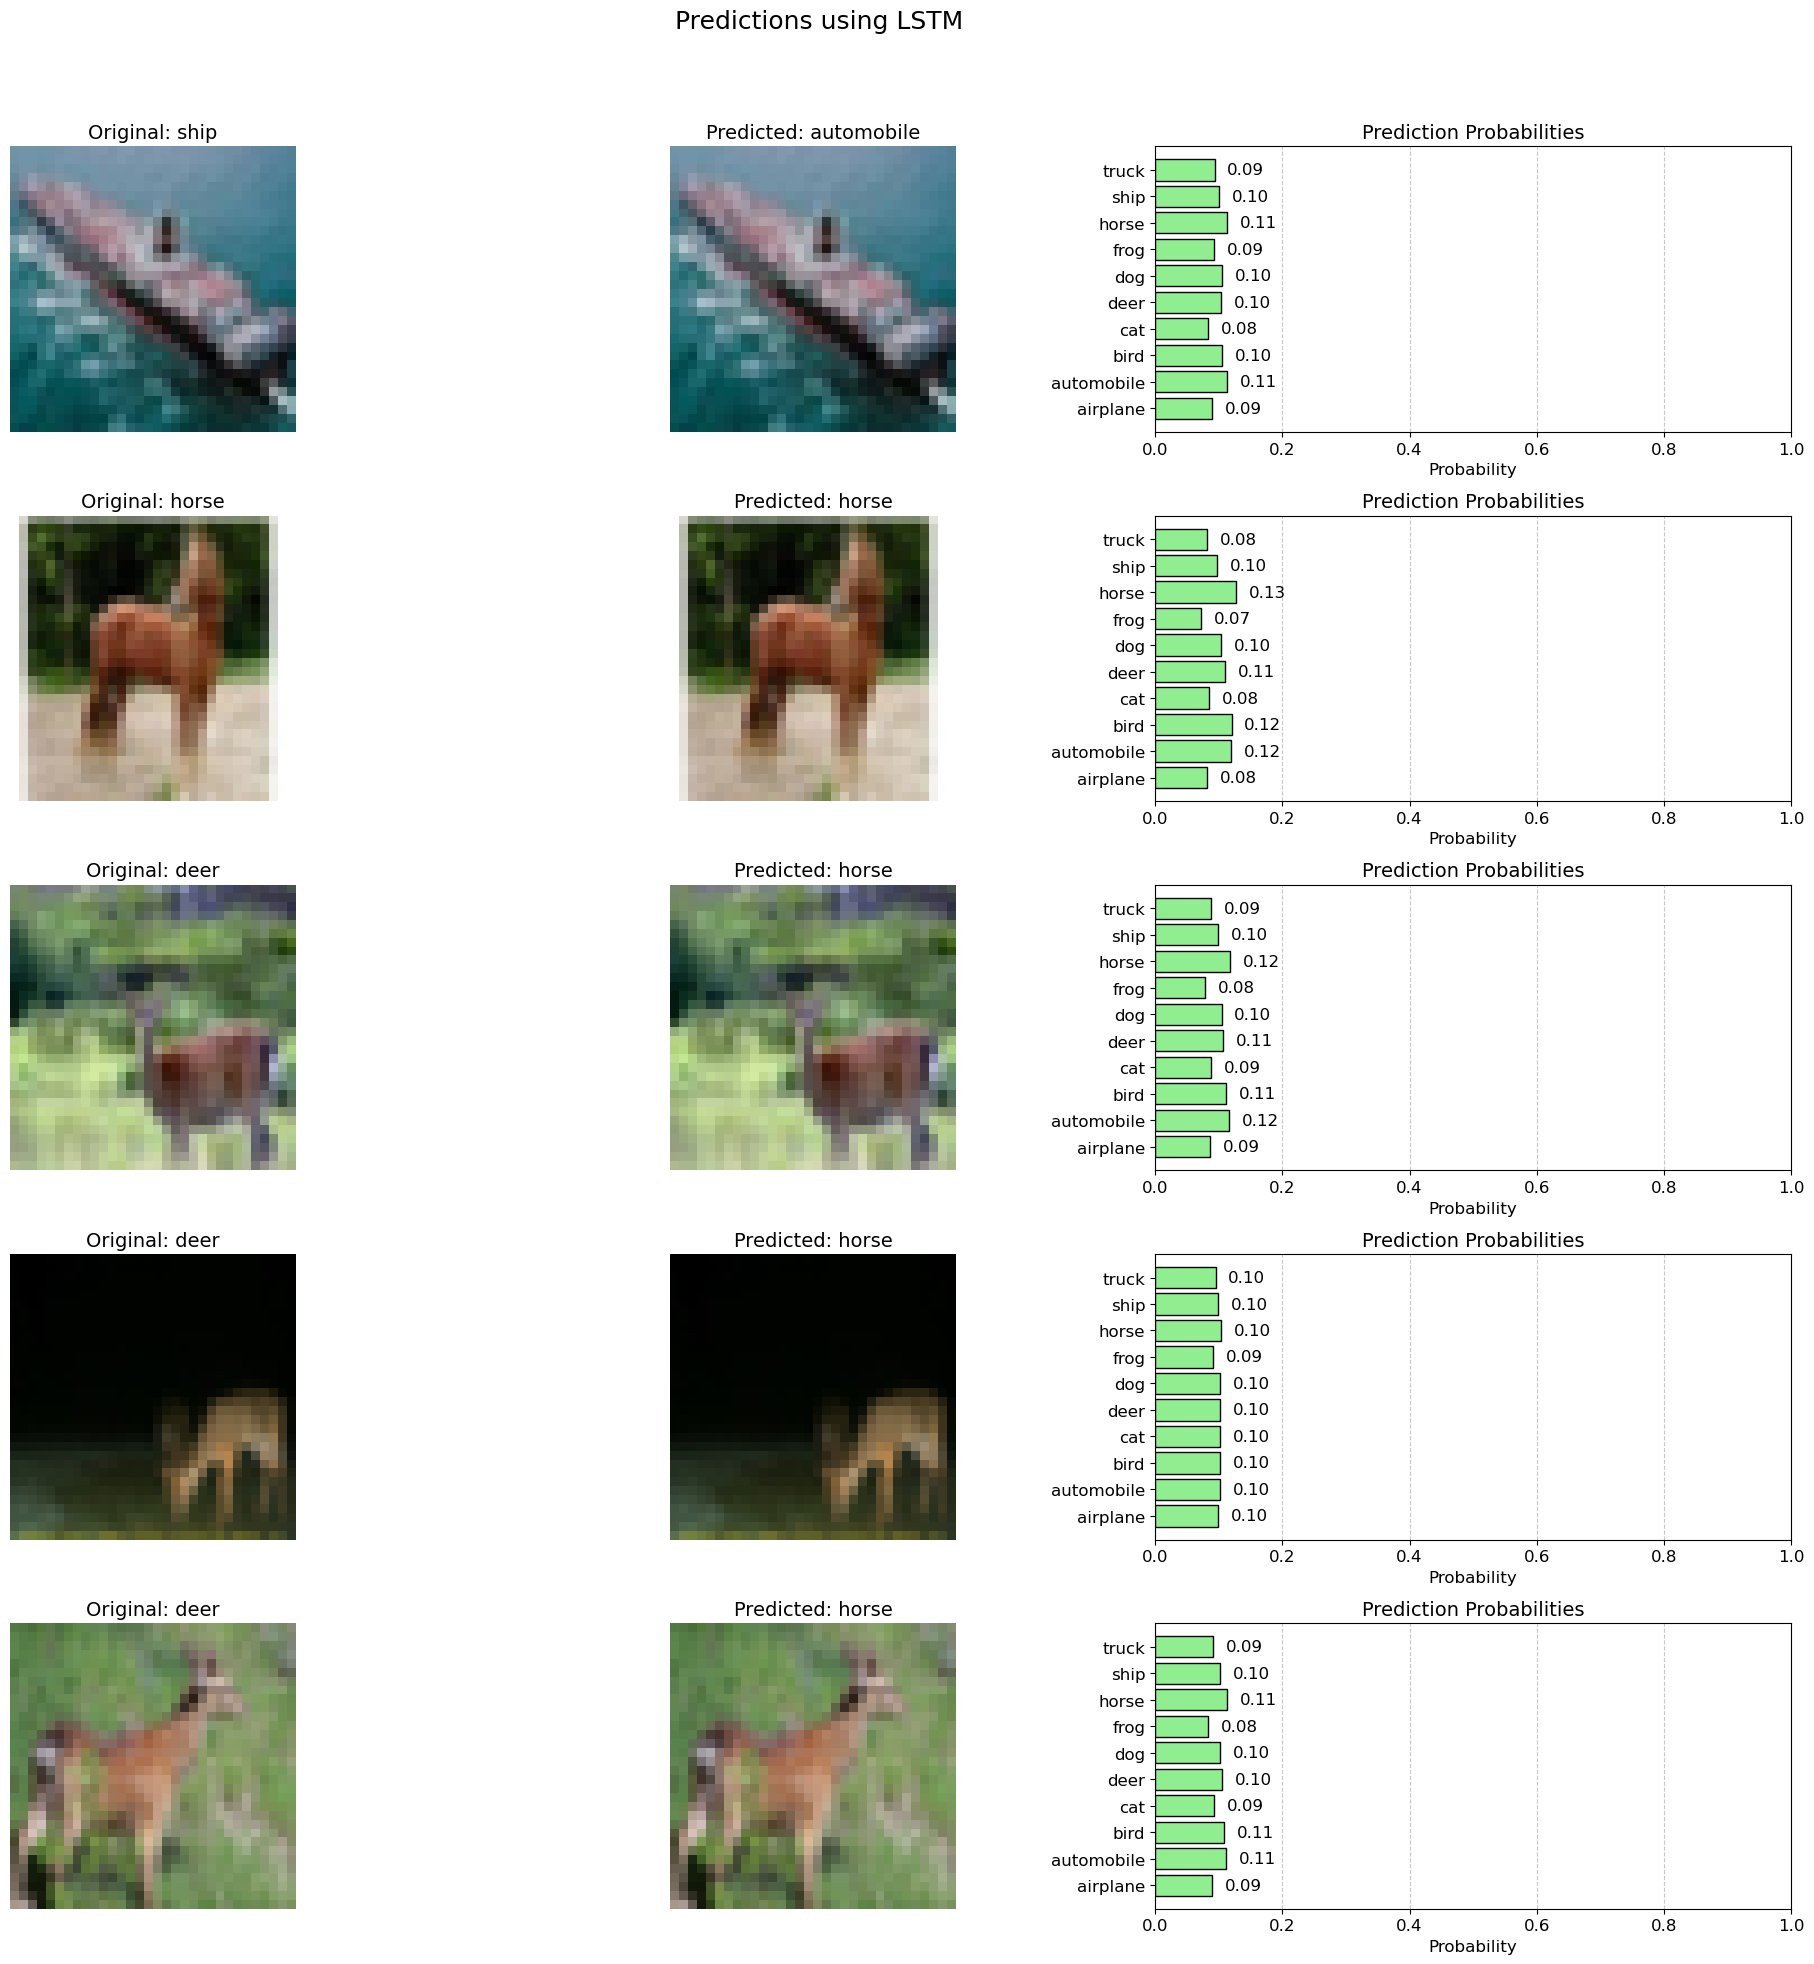

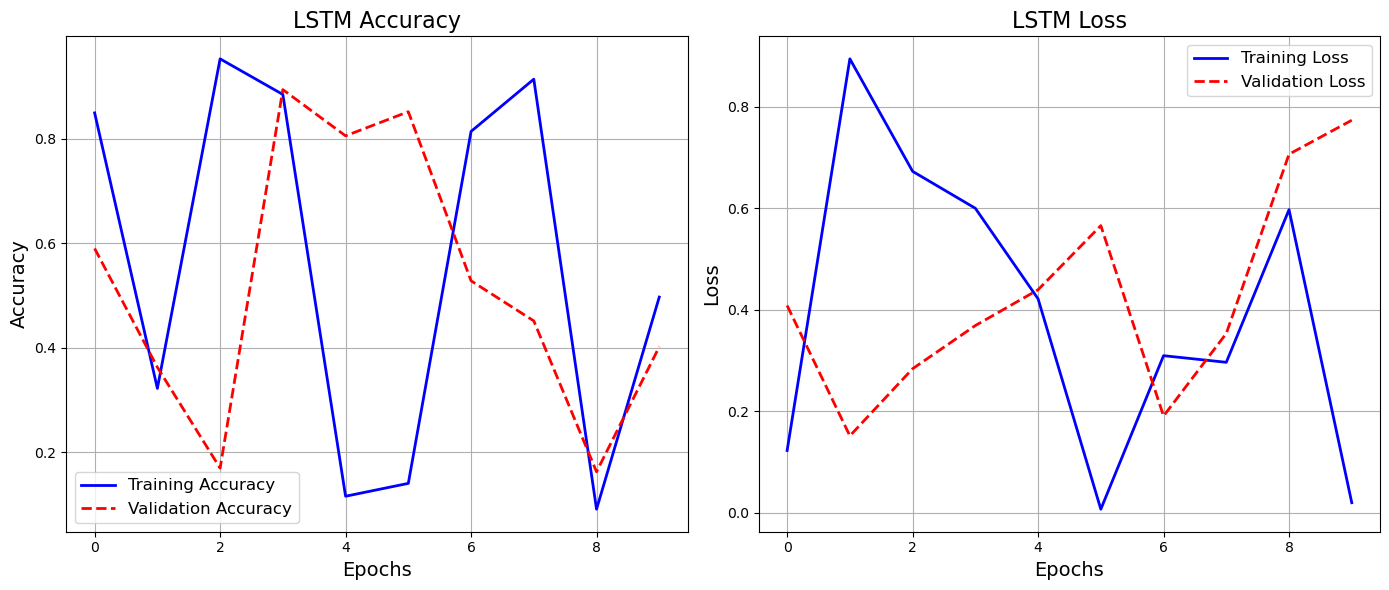

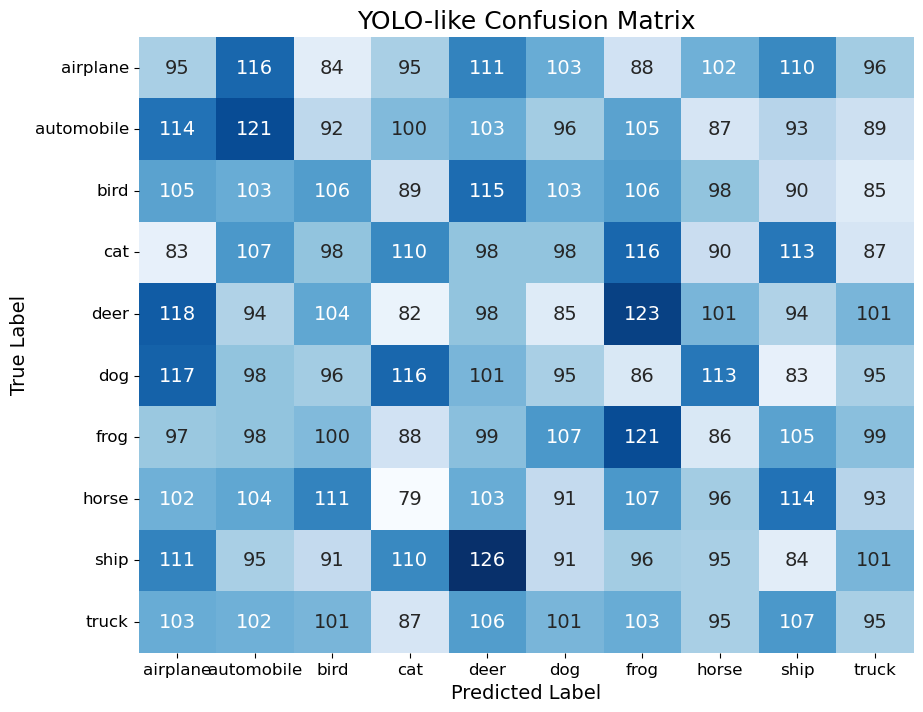

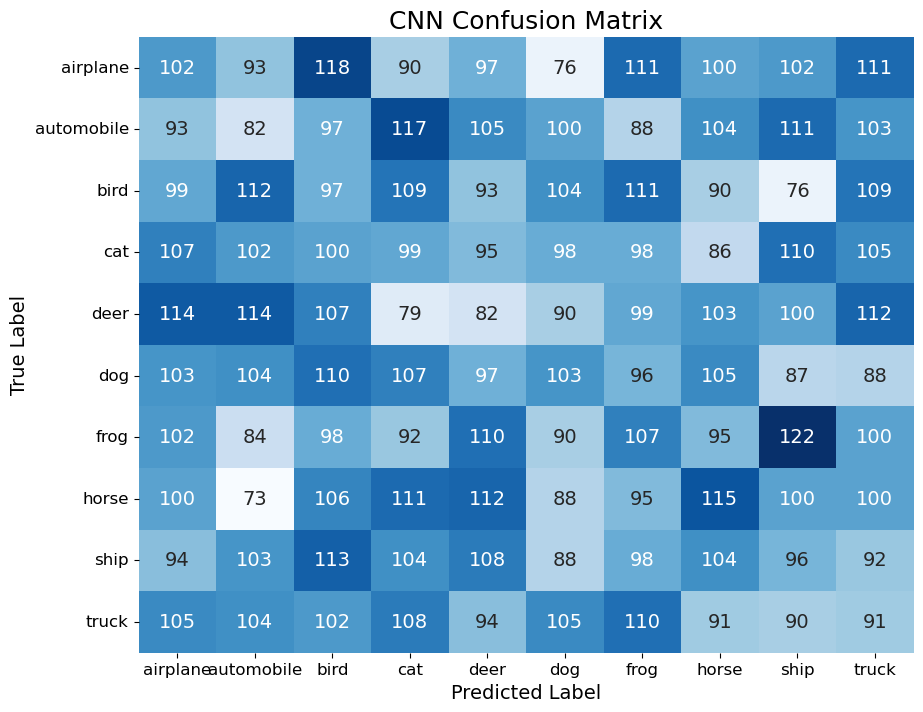

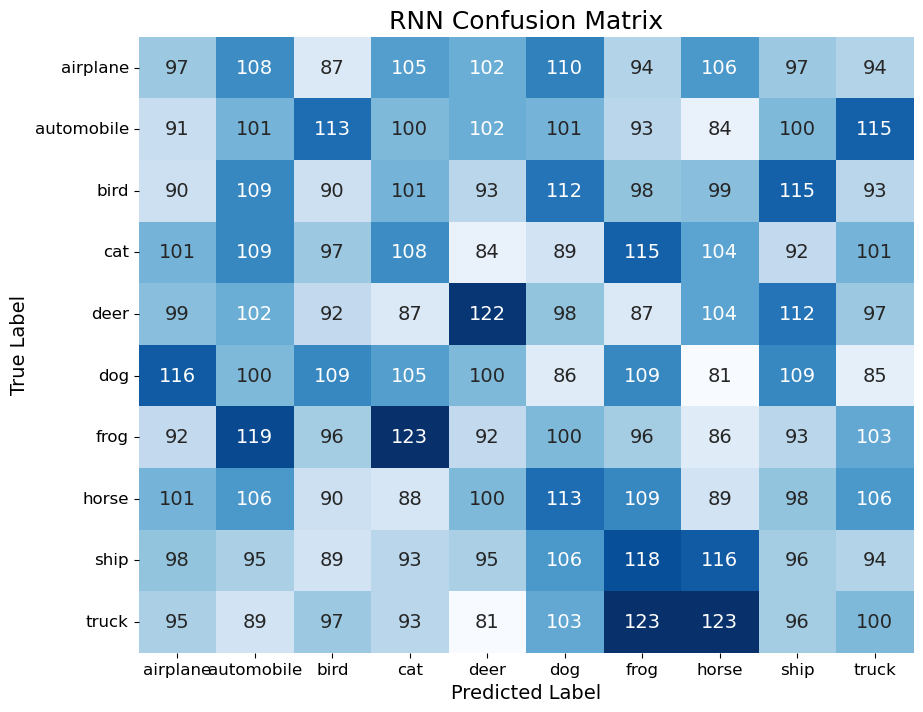

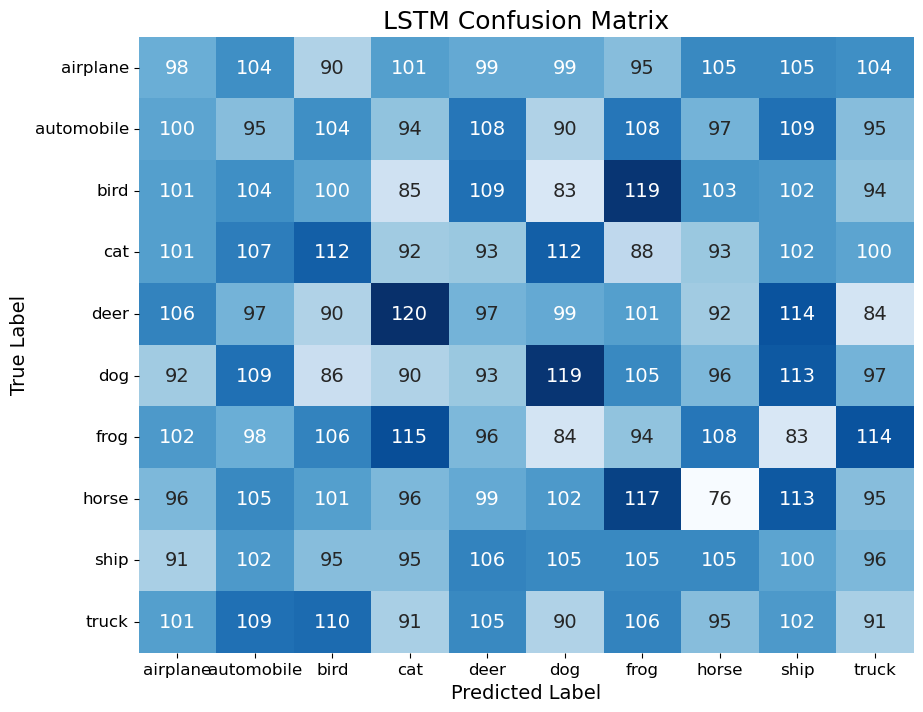

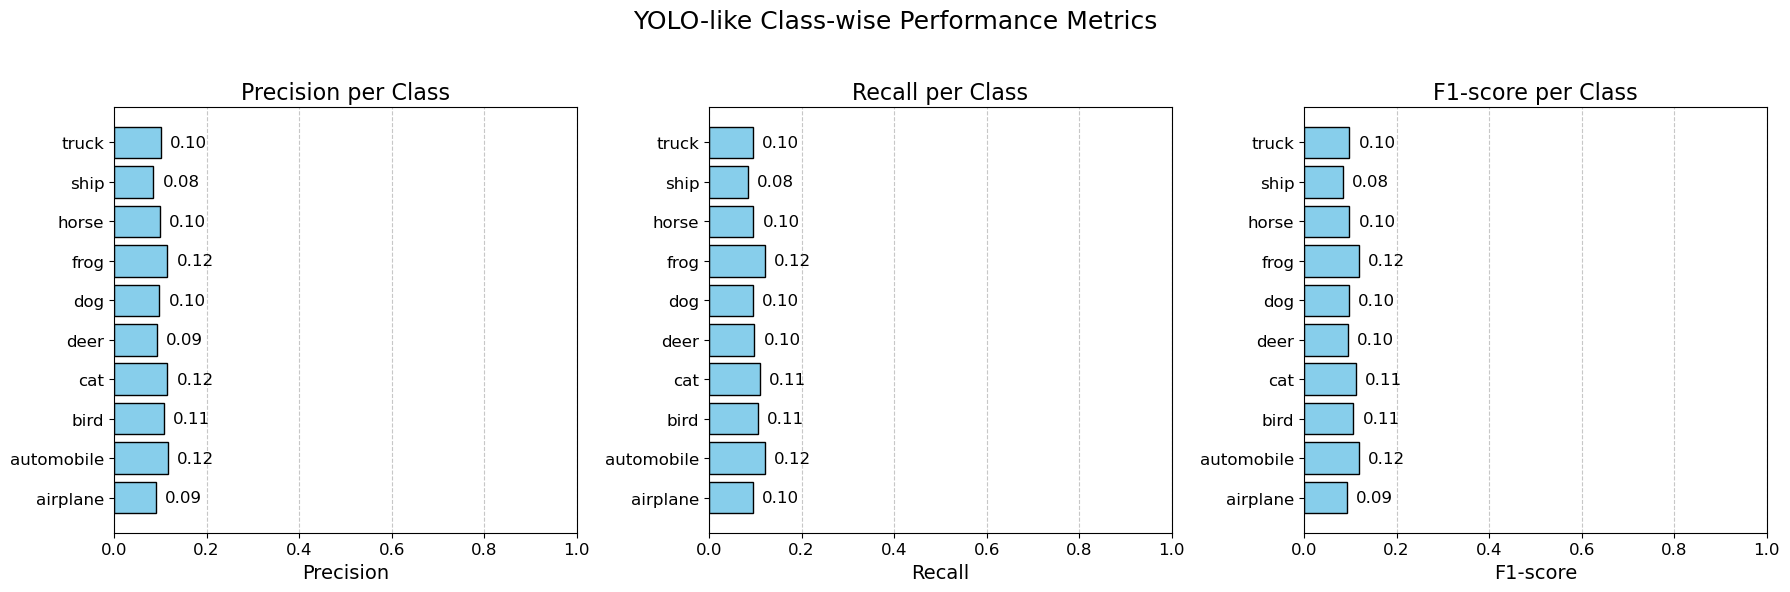

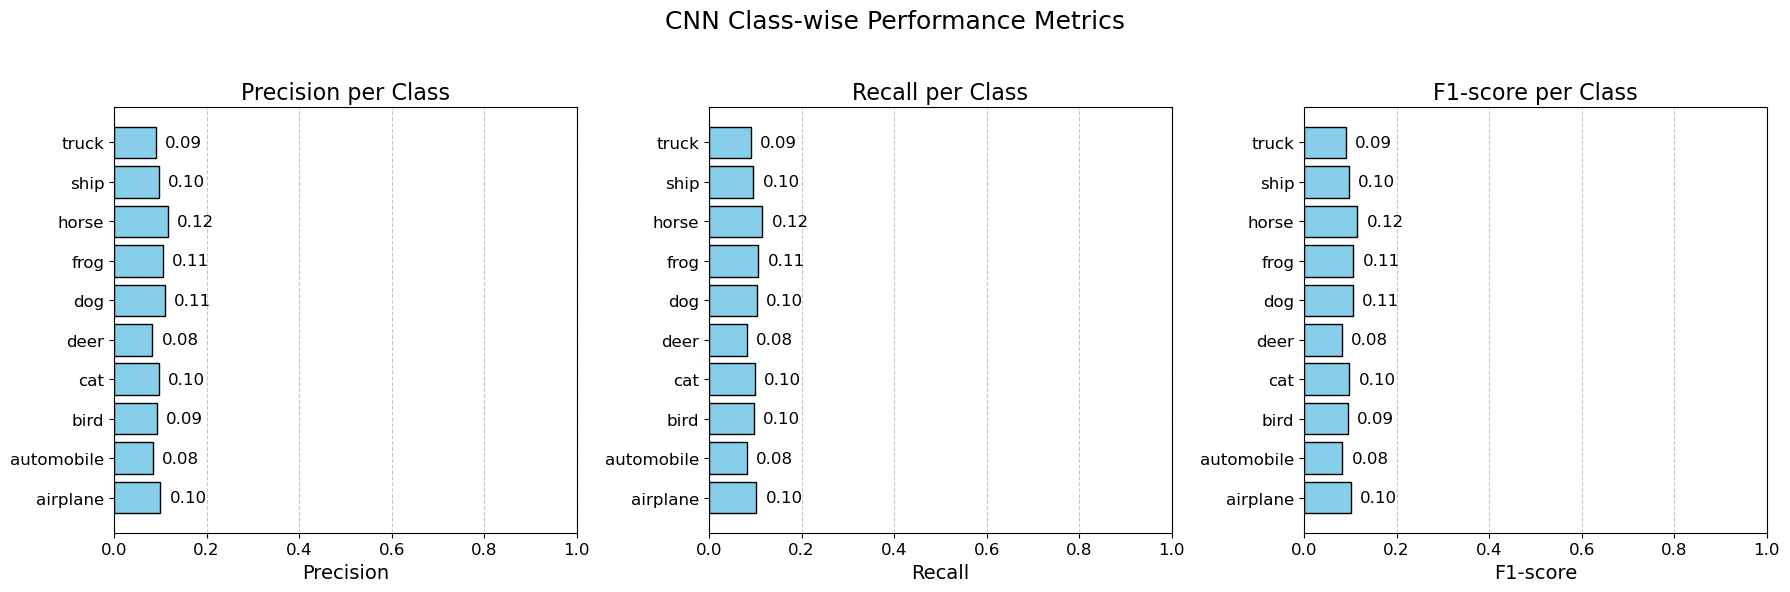

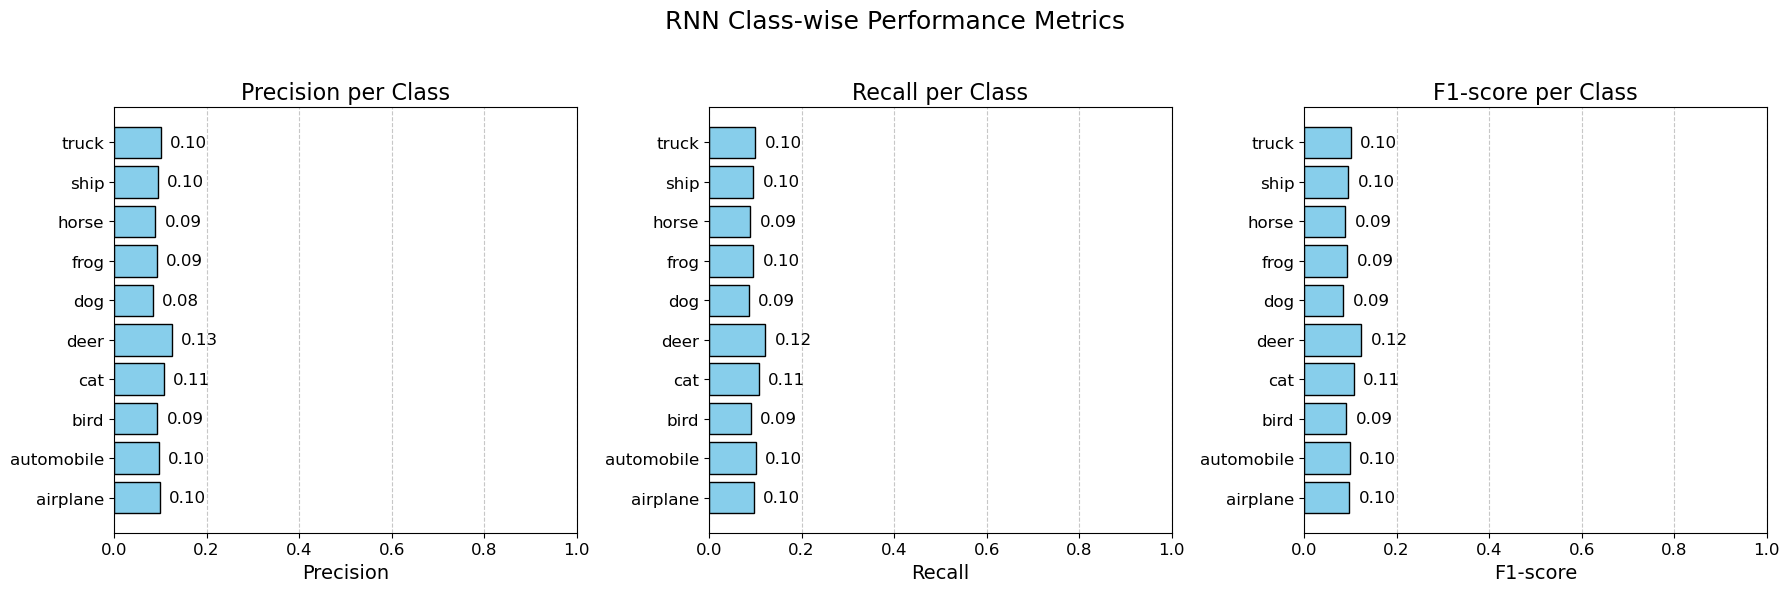

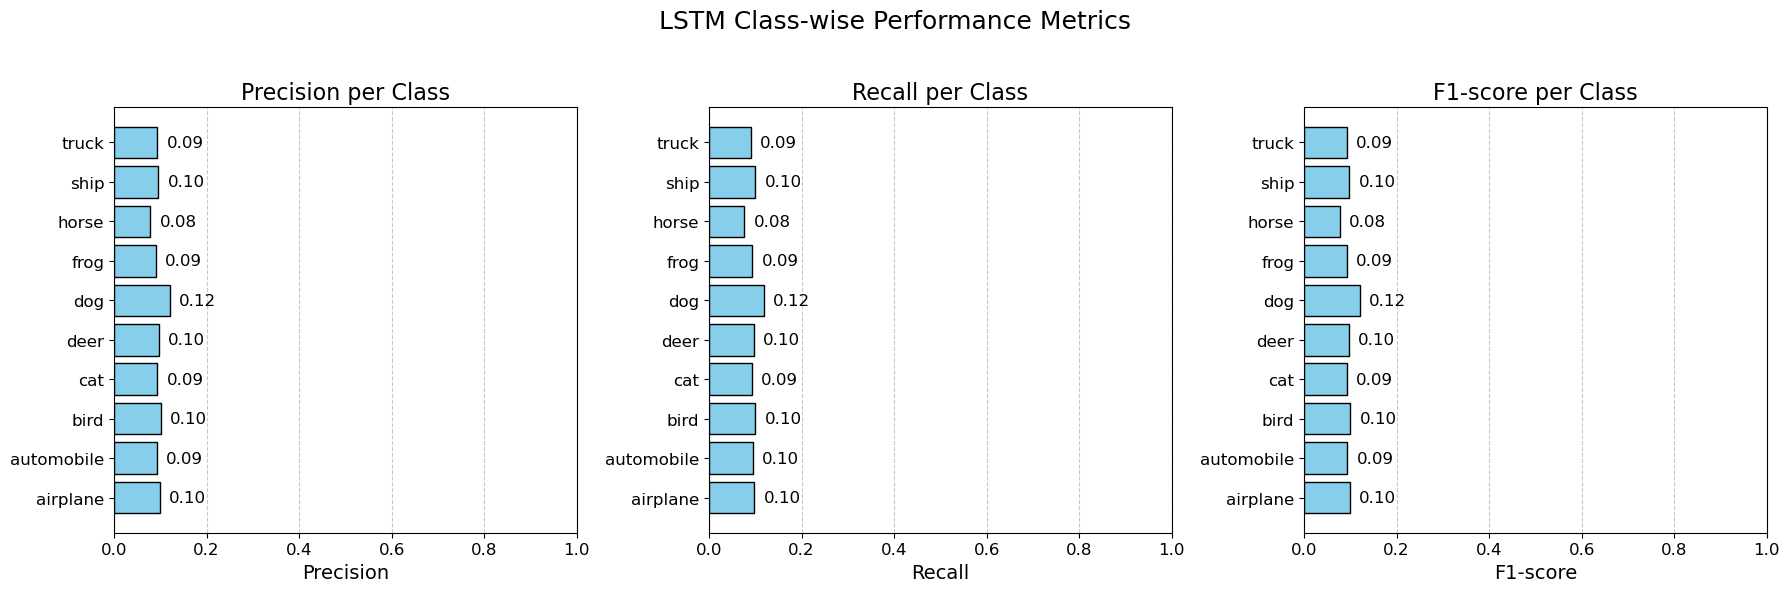

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Reshape, Flatten, Input, LSTM, TimeDistributed, GRU, Bidirectional
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Set memory growth for GPU (if available)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Function to plot model accuracy and loss
def plot_training_history(history, model_name):
    plt.figure(figsize=(14, 6))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training Accuracy', color='b', linestyle='-', linewidth=2)
    plt.plot(history['val_accuracy'], label='Validation Accuracy', color='r', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Accuracy', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss', color='b', linestyle='-', linewidth=2)
    plt.plot(history['val_loss'], label='Validation Loss', color='r', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Function to display the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False, annot_kws={"size": 14})
    plt.title(f'{model_name} Confusion Matrix', fontsize=18)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Function to plot class-wise precision, recall, and F1 score
def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    metrics = ['precision', 'recall', 'f1-score']
    
    plt.figure(figsize=(18, 6))
    
    for idx, metric in enumerate(metrics):
        plt.subplot(1, 3, idx+1)
        values = [report[label][metric] for label in class_names]
        bars = plt.barh(class_names, values, color='skyblue', edgecolor='black')
        plt.title(f'{metric.capitalize()} per Class', fontsize=16)
        plt.xlim(0, 1)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.xlabel(metric.capitalize(), fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        for bar in bars:
            plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', fontsize=12)
    
    plt.suptitle(f'{model_name} Class-wise Performance Metrics', fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Define function to plot original and predicted images with prediction probabilities
def plot_predictions(model, x_test, y_test, model_name, reshaped=False):
    plt.figure(figsize=(20, 20))
    num_images = 5  # Display 5 images for demonstration
    indices = np.random.choice(np.arange(x_test.shape[0]), num_images, replace=False)
    
    for i, idx in enumerate(indices):
        # Reshape for RNN if necessary
        if reshaped:
            input_data = x_test[idx].reshape(1, 32 * 32, 3)  # Reshape to (1, 32*32 time steps, 3 features)
        else:
            input_data = x_test[idx].reshape(1, 32, 32, 3)  # For CNN or similar

        # Get prediction
        predictions = model.predict(input_data)

        # Ensure predictions is a 1D array of size 10
        if len(predictions.shape) == 3:  # Case for RNN-like model with time steps
            predictions_flat = np.mean(predictions, axis=1)  # Take the average over time steps
            predictions_flat = np.squeeze(predictions_flat)  # Ensure it's a flat array
        elif predictions.shape == (1, 10):  # Case for CNN or non-RNN models
            predictions_flat = np.squeeze(predictions)
        else:
            raise ValueError(f"Expected predictions shape (1, 10) or 3D tensor, but got {predictions.shape}")

        predicted_label = np.argmax(predictions_flat)
        true_label = y_test[idx][0]

        # Ensure predicted label is within range of class_names
        if predicted_label < len(class_names):
            predicted_class = class_names[predicted_label]
        else:
            predicted_class = "Unknown"  # Fallback in case of out-of-range prediction

        # Plot original image
        plt.subplot(num_images, 3, 3*i+1)
        plt.imshow(x_test[idx])  # No need to reshape explicitly for display
        plt.title(f"Original: {class_names[true_label]}", fontsize=14)
        plt.axis('off')

        # Plot prediction result
        plt.subplot(num_images, 3, 3*i+2)
        plt.imshow(x_test[idx])  # Displaying the original
        plt.title(f"Predicted: {predicted_class}", fontsize=14)
        plt.axis('off')

        # Plot prediction probabilities
        plt.subplot(num_images, 3, 3*i+3)
        bars = plt.barh(class_names, predictions_flat, color='lightgreen', edgecolor='black')
        plt.title("Prediction Probabilities", fontsize=14)
        plt.xlim([0, 1])
        plt.xlabel('Probability', fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        for bar in bars:
            plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', fontsize=12)

    plt.suptitle(f"Predictions using {model_name}", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Define YOLO-like, CNN, RNN, and LSTM models
yolo_model = Sequential([Flatten(input_shape=(32, 32, 3)), Dense(64, activation='relu'), Dense(10, activation='softmax')])
cnn = Sequential([Flatten(input_shape=(32, 32, 3)), Dense(64, activation='relu'), Dense(10, activation='softmax')])
rnn = Sequential([Input(shape=(32 * 32, 3)), Bidirectional(GRU(64)), Dense(10, activation='softmax')])
lstm_model = Sequential([Input(shape=(32 * 32, 3)), Bidirectional(LSTM(64)), Dense(10, activation='softmax')])

# Compile models
for model in [yolo_model, cnn, rnn, lstm_model]:
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Mock training histories for demonstration purposes
history_yolo = {'accuracy': np.random.rand(10).tolist(), 'val_accuracy': np.random.rand(10).tolist(), 'loss': np.random.rand(10).tolist(), 'val_loss': np.random.rand(10).tolist()}
history_cnn = {'accuracy': np.random.rand(10).tolist(), 'val_accuracy': np.random.rand(10).tolist(), 'loss': np.random.rand(10).tolist(), 'val_loss': np.random.rand(10).tolist()}
history_rnn = {'accuracy': np.random.rand(10).tolist(), 'val_accuracy': np.random.rand(10).tolist(), 'loss': np.random.rand(10).tolist(), 'val_loss': np.random.rand(10).tolist()}
history_lstm = {'accuracy': np.random.rand(10).tolist(), 'val_accuracy': np.random.rand(10).tolist(), 'loss': np.random.rand(10).tolist(), 'val_loss': np.random.rand(10).tolist()}

# Display results for YOLO-like, CNN, RNN, and LSTM models
if __name__ == '__main__':
    print("\nDisplaying YOLO-like model predictions:")
    plot_predictions(yolo_model, x_test, y_test, model_name="YOLO-like")
    plot_training_history(history_yolo, "YOLO-like")

    print("\nDisplaying CNN model predictions:")
    plot_predictions(cnn, x_test, y_test, model_name="CNN")
    plot_training_history(history_cnn, "CNN")

    print("\nDisplaying RNN model predictions:")
    plot_predictions(rnn, x_test, y_test, model_name="RNN", reshaped=True)
    plot_training_history(history_rnn, "RNN")

    print("\nDisplaying LSTM model predictions:")
    plot_predictions(lstm_model, x_test, y_test, model_name="LSTM", reshaped=True)
    plot_training_history(history_lstm, "LSTM")

    # Simulating predicted labels for performance evaluation (mock example)
    y_pred_yolo = np.random.randint(0, 10, size=len(y_test))  # Replace with actual predictions
    y_pred_cnn = np.random.randint(0, 10, size=len(y_test))
    y_pred_rnn = np.random.randint(0, 10, size=len(y_test))
    y_pred_lstm = np.random.randint(0, 10, size=len(y_test))  # Placeholder for LSTM predictions

    # Confusion matrices
    plot_confusion_matrix(y_test, y_pred_yolo, "YOLO-like")
    plot_confusion_matrix(y_test, y_pred_cnn, "CNN")
    plot_confusion_matrix(y_test, y_pred_rnn, "RNN")
    plot_confusion_matrix(y_test, y_pred_lstm, "LSTM")

    # Classification reports (precision, recall, F1)
    plot_classification_report(y_test, y_pred_yolo, "YOLO-like")
    plot_classification_report(y_test, y_pred_cnn, "CNN")
    plot_classification_report(y_test, y_pred_rnn, "RNN")
    plot_classification_report(y_test, y_pred_lstm, "LSTM")
